<a href="https://colab.research.google.com/github/Rony-dot/corona_prediction/blob/main/Only_OWID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
country_name = 'Bangladesh'

In [ ]:
# world = pd.read_csv('worldwide-aggregate.csv')
# world

In [ ]:
# https://datahub.io/core/covid-19
# time_ = pd.read_csv('time-series-19-covid-combined_csv.csv')
# time_ = time_.loc[time_['Country/Region']=='Bangladesh' ]
# time_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import time
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
import math



In [ ]:
# key_countries  = pd.read_csv('key-countries-pivoted.csv')
# key_countries
# # Date	China	US	United_Kingdom	Italy	France	Germany	Spain	Iran

In [ ]:
# us_simplified  = pd.read_csv('us_simplified.csv')
# us_simplified
# Date	Admin2	Province/State	Confirmed	Deaths	Country/Region

In [ ]:
# worldwide_aggregate  = pd.read_csv('worldwide-aggregate.csv')
# worldwide_aggregate
# Date	Confirmed	Recovered	Deaths	Increase rat

In [ ]:
# countries = pd.read_csv('countries-aggregated.csv')
# countries =   countries.loc[countries['Country']=='US']
# countries
# Date	Country	Confirmed	Recovered	Deaths
# 2021-04-20	US	31792110	0	568461

In [ ]:
# 23.6850° N, 90.3563° E bangladesh
# 20.5937° N, 78.9629° E India
# temp_india = pd.read_csv('temp_india.csv')
# https://power.larc.nasa.gov/data-access-viewer/
import time
name = time.time()
name = str(int(name))
print(name)

temp_country_base = pd.read_csv('temp_bd.csv')
# mm-dd-yyyy
temp_country_base = temp_country_base[['T2M_MAX']]
temp_country_base['date'] = pd.date_range(start='4/1/2020', periods=len(temp_country_base), freq='D')
temp_country_base['date'] = pd.to_datetime(temp_country_base['date']).dt.date
temp_country_base = temp_country_base.rename({'T2M_MAX':'temp'},axis=1)
temp_country_base.to_csv(f'temp_{name}.csv',index = None, header=True)
temp_country = pd.read_csv(f'temp_{name}.csv')
temp_country = temp_country.loc[temp_country['date']>='2020-04-07']
temp_country =  temp_country.loc[temp_country['date']<='2021-04-27']
columns_titles = ['date','temp']
temp_country = temp_country.reindex(columns=columns_titles)
temp_country


1622649040


,date,temp
6,2020-04-07,37.18
7,2020-04-08,37.64
8,2020-04-09,35.99
9,2020-04-10,37.25
10,2020-04-11,36.79
...,...,...
387,2021-04-23,38.75
388,2021-04-24,40.80
389,2021-04-25,41.76
390,2021-04-26,41.75


In [ ]:
temp_country.loc[temp_country['date']>='2021-03-28']

,date,temp
361,2021-03-28,36.99
362,2021-03-29,37.95
363,2021-03-30,38.83
364,2021-03-31,39.82
365,2021-04-01,39.41
366,2021-04-02,37.88
367,2021-04-03,38.32
368,2021-04-04,38.52
369,2021-04-05,38.29
370,2021-04-06,38.68


In [ ]:
# temp_india.info()

In [ ]:
# !pip install bayesian-optimization
# !pip install keras-tuner

In [ ]:

'''from datetime import datetime 
temparature = pd.read_excel("Temparature.xlsx")
temparature.to_csv("Temparature.csv", index = None, header=True)
temparature = pd.read_csv('Temparature.csv')
temparature.rename(columns={'date ': 'date'}, inplace=True)
# temparature['date'] = temparature['date'].datetime.date
# pd.to_datetime(temparature['date'], utc=False)
# temparature['date']= pd.to_datetime(temparature['date'])

# temparature['date'] = pd.to_datetime(temparature['date'], format='%Y-%m-%d')
# temparature['date'].values
# temparature['date'] = str(temparature['date'])
# temparature['date'] = temparature['date'].datetime.normalize()
# dff['date'] = pd.date_range(start='3/3/2020', periods=len(df), freq='D')
# temparature'''

'from datetime import datetime \ntemparature = pd.read_excel("Temparature.xlsx")\ntemparature.to_csv("Temparature.csv", index = None, header=True)\ntemparature = pd.read_csv(\'Temparature.csv\')\ntemparature.rename(columns={\'date \': \'date\'}, inplace=True)\n# temparature[\'date\'] = temparature[\'date\'].datetime.date\n# pd.to_datetime(temparature[\'date\'], utc=False)\n# temparature[\'date\']= pd.to_datetime(temparature[\'date\'])\n\n# temparature[\'date\'] = pd.to_datetime(temparature[\'date\'], format=\'%Y-%m-%d\')\n# temparature[\'date\'].values\n# temparature[\'date\'] = str(temparature[\'date\'])\n# temparature[\'date\'] = temparature[\'date\'].datetime.normalize()\n# dff[\'date\'] = pd.date_range(start=\'3/3/2020\', periods=len(df), freq=\'D\')\n# temparature'

In [ ]:
Temparature = pd.DataFrame({'temp':[30,30,30,31,29,28,30,31,32,33,34,33,33,33,32,32,33,33,34,31,31,32,34,35,35,36,36,35,36,37,37,34,36,36,35,36,37,37,37,37,3133,36,33,33,33,35,36,32,31,33,2,30,31,31,33,30,31,32,29,30,31,35,35,31,33,34,33,33,33,33,34,34,34,35,34,34,34,27,30,31,32,33,33,33,30,31,34,32,34,34,33,32,32,32,32,36,31,33,33,29,32,29,31,34,35,28,31,30,32,31,32,33,33,35,31,33,32,34,36,33,36,33,32,32,31,33,33,31,31,32,29,31,31,32,34,32,33,33,29,28,30,30,31,33,35,33,32,32,34,32,33,34,35,32,31,34,32,35,34,34,33,31,34,34,31,30,31,30,31,28,30,29,32,33,32,31,32,30,31,33,32,29,34,33,35,34,33,31,33,31,30,31,32,32,32,33,32,33,29,34,33,31,31,31,30,30,31,31,33,31,34,31,31,31,32,31,30,31,31,33,33,33,31,32,33,32,33,34,31,30,34,33,29,27,28,32,31,32,32,33,33,30,30,30,31,32,31,30,30,30,31,32,32,31,31,32,32,31,31,28,30,29,27,27,27,27,28,27,27,27,30,29,28,28,26,28,27,27,27,27,23,24,22,23,24,26,25,26,23,25,24,24,23,23,23,26,25,26,23,24,25,27,26,26,24,26,27,27,27,26,29,27,27,27,26,25,25,26,26,23,23,23,23,25,23,23,23,25,25,23,23,25,25,24,22,24,26,27,28,28,25,26,28,27,26,26,27,27,27,27,27,26,28,27,30,28,28,28,28,31,32,33,33,31,32,31,32,33,31,31,31,31,32,33,32,31,32,33,32,33,32,34,35,35,35,34,35,36,35,35,34,34,35,36,35,34,35,34,34,35,33,34,34,35,36,36,36,35,34,33,35,36,36,36,33,35,36,37,37,37]})
Temparature['date'] = pd.date_range(start='3/3/2020', periods=len(Temparature), freq='D')
# Temparature['date'] = pd.to_datetime(Temparature['date']).dt.date
Temparature.to_csv('Temparature.csv',index = None, header=True)
Temparature = pd.read_csv('Temparature.csv')
# files.download('Temparature.csv')
Temparature

,temp,date
0,30,2020-03-03
1,30,2020-03-04
2,30,2020-03-05
3,31,2020-03-06
4,29,2020-03-07
...,...,...
415,35,2021-04-22
416,36,2021-04-23
417,37,2021-04-24
418,37,2021-04-25


In [ ]:
Temparature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   temp    420 non-null    int64 
 1   date    420 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


In [ ]:
# temparature.info()

In [ ]:
main_time_series = pd.read_csv('time-series-19-covid-combined.csv')
uq = main_time_series['Country/Region'].unique()
uq

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [ ]:
time_series = pd.read_csv('time-series-19-covid-combined.csv')
time_series = time_series.loc[time_series['Country/Region']==country_name ]
# format = '%Y-%m-%d %H:%M:%S'
# time_series['Date'] = pd.to_datetime(time_series['Date'], format=format)
# time_series = time_series.set_index('Date')
time_series = time_series.drop(['Country/Region', 'Province/State'], axis=1)
time_series['Active'] = time_series['Confirmed'] - time_series['Deaths'] - time_series['Recovered']
time_series = time_series.rename({'Date':'date'},axis=1)
# time_series['date'] = pd.to_datetime(time_series['date'])
# time_series['date'] = pd.to_datetime(time_series['date']).dt.date

print(time_series.shape)
print(type(time_series))
ts = time_series
time_series


(462, 5)
<class 'pandas.core.frame.DataFrame'>


,date,Confirmed,Recovered,Deaths,Active
9240,2020-01-22,0,0.0,0,0.0
9241,2020-01-23,0,0.0,0,0.0
9242,2020-01-24,0,0.0,0,0.0
9243,2020-01-25,0,0.0,0,0.0
9244,2020-01-26,0,0.0,0,0.0
...,...,...,...,...,...
9697,2021-04-23,739703,647674.0,10869,81160.0
9698,2021-04-24,742400,653151.0,10952,78297.0
9699,2021-04-25,745322,657452.0,11053,76817.0
9700,2021-04-26,748628,661693.0,11150,75785.0


In [ ]:
tss = ts
# tst = ts
# conf = ts['Confirmed'].values
# # conf = conf.reshape(1,-1)
# # conf.shape
# n = []
# it = 0
# for i in conf:
#   prev = 
#   if it == 0:
#     n.append(i)
#     continue
#   n.append(i+1-i)

#   it+=1

# print(it)
tss = ts.set_index('date').diff()
time_series['Confirmed'] = + tss['Confirmed'].values
time_series['Recovered'] = tss['Recovered'].values
time_series['Deaths'] =  + tss['Deaths'].values

time_series.tail(100)
# tss

,date,Confirmed,Recovered,Deaths,Active
9602,2021-01-18,697.0,736.0,16.0,47234.0
9603,2021-01-19,702.0,682.0,20.0,47234.0
9604,2021-01-20,656.0,617.0,8.0,47265.0
9605,2021-01-21,584.0,602.0,16.0,47231.0
9606,2021-01-22,619.0,487.0,15.0,47348.0
...,...,...,...,...,...
9697,2021-04-23,3629.0,5225.0,88.0,81160.0
9698,2021-04-24,2697.0,5477.0,83.0,78297.0
9699,2021-04-25,2922.0,4301.0,101.0,76817.0
9700,2021-04-26,3306.0,4241.0,97.0,75785.0


In [ ]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 9240 to 9701
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       462 non-null    object 
 1   Confirmed  461 non-null    float64
 2   Recovered  461 non-null    float64
 3   Deaths     461 non-null    float64
 4   Active     462 non-null    float64
dtypes: float64(4), object(1)
memory usage: 21.7+ KB


In [ ]:
# choosing from 2020-04-07 because before this day every value was 0
time_series = time_series.loc[time_series['date']>='2020-04-07']
print(time_series.shape)
# new_time[:10]
# new_time.isna().any()
# time_series[40:70]

(386, 5)


In [ ]:
time_series.isna().sum()

date         0
Confirmed    0
Recovered    0
Deaths       0
Active       0
dtype: int64

In [ ]:
dataset = pd.read_csv("owid-covid-data (2).csv")
# dataset

In [ ]:
# dataset['date'] = pd.to_datetime(dateset['date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84530 entries, 0 to 84529
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               84530 non-null  object 
 1   continent                              80446 non-null  object 
 2   location                               84530 non-null  object 
 3   date                                   84530 non-null  object 
 4   total_cases                            82475 non-null  float64
 5   new_cases                              82473 non-null  float64
 6   new_cases_smoothed                     81472 non-null  float64
 7   total_deaths                           72835 non-null  float64
 8   new_deaths                             72993 non-null  float64
 9   new_deaths_smoothed                    81472 non-null  float64
 10  total_cases_per_million                82029 non-null  float64
 11  ne

In [ ]:
# usa = dataset.loc[dataset['location']=='America']
usa =  dataset.location.unique()
usa

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fij

In [ ]:
dataset_bd = dataset.loc[dataset['location']==country_name]
dataset_bd.reset_index(inplace=True)
dataset_bd = dataset_bd.loc[dataset_bd['date']>='2020-04-07']
dataset_bd

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
35,6618,BGD,Asia,Bangladesh,2020-04-07,164.0,41.0,16.143,17.0,5.0,1.714,0.996,0.249,0.098,0.103,0.030,0.010,2.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,981.0,5383.0,0.033,0.006,518.0,0.003,0.031,32.1,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.04,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
36,6619,BGD,Asia,Bangladesh,2020-04-08,218.0,54.0,23.429,20.0,3.0,2.000,1.324,0.328,0.142,0.121,0.018,0.012,2.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1097.0,6480.0,0.039,0.007,653.0,0.004,0.036,27.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.04,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
37,6620,BGD,Asia,Bangladesh,2020-04-09,330.0,112.0,39.143,21.0,1.0,2.143,2.004,0.680,0.238,0.128,0.006,0.013,2.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1184.0,7664.0,0.047,0.007,793.0,0.005,0.049,20.3,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.04,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
38,6621,BGD,Asia,Bangladesh,2020-04-10,424.0,94.0,51.857,27.0,6.0,3.000,2.575,0.571,0.315,0.164,0.036,0.018,2.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,649.0,8313.0,0.050,0.004,824.0,0.005,0.063,15.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.74,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
39,6622,BGD,Asia,Bangladesh,2020-04-11,482.0,58.0,58.857,30.0,3.0,3.143,2.927,0.352,0.357,0.182,0.018,0.019,2.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1340.0,9653.0,0.059,0.008,963.0,0.006,0.061,16.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.52,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,6999,BGD,Asia,Bangladesh,2021-04-23,739703.0,3629.0,3989.143,10869.0,88.0,98.143,4491.504,22.035,24.222,65.997,0.534,0.596,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25896.0,5302574.0,32.197,0.157,24076.0,0.146,0.166,6.0,tests performed,NaN,NaN,NaN,NaN,154118.0,NaN,NaN,NaN,936.0,83.33,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
417,7000,BGD,Asia,Bangladesh,2021-04-24,742400.0,2697.0,3878.286,10952.0,83.0,95.571,4507.880,16.376,23.549,66.501,0.504,0.580,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20571.0,5323145.0,32.322,0.125,24702.0,0.150,0.157,6.4,tests performed,7954176.0,5798880.0,2155296.0,NaN,146862.0,4.83,3.52,1.31,892.0,83.33,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
418,7001,BGD,Asia,Bangladesh,2021-04-25,745322.0,2922.0,376

In [ ]:
# dataset_bd.reset_index(inplace=True)
# dataset_bd_cols = dataset_bd[['date','new_cases', 'new_tests', 'new_deaths', 'positive_rate', 'reproduction_rate']]
dataset_bd_cols = dataset_bd[['date','new_cases', 'new_tests', 'new_deaths']]
# dataset_bd_cols.fillna(0, inplace=True)
# dataset_bd_cols = dataset_bd_cols.dropna()
print(dataset_bd_cols.shape)
dataset_bd_cols

(386, 4)


,date,new_cases,new_tests,new_deaths
35,2020-04-07,41.0,981.0,5.0
36,2020-04-08,54.0,1097.0,3.0
37,2020-04-09,112.0,1184.0,1.0
38,2020-04-10,94.0,649.0,6.0
39,2020-04-11,58.0,1340.0,3.0
...,...,...,...,...
416,2021-04-23,3629.0,25896.0,88.0
417,2021-04-24,2697.0,20571.0,83.0
418,2021-04-25,2922.0,21922.0,101.0
419,2021-04-26,3306.0,25786.0,97.0


In [ ]:
print(dataset_bd_cols.info())
dataset_bd_cols.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 35 to 420
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        386 non-null    object 
 1   new_cases   386 non-null    float64
 2   new_tests   384 non-null    float64
 3   new_deaths  386 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.1+ KB
None


date          0
new_cases     0
new_tests     2
new_deaths    0
dtype: int64

In [ ]:
# print(type(Temparature['date']), type(dataset_bd_cols['date']))

In [ ]:
# print(temp_india.info())

In [ ]:
Temparature = temp_country
dataset_new = pd.merge(Temparature, dataset_bd_cols, on=['date'], how='right')
# dataset_new = dataset_bd_cols
dataset_new.reset_index(drop=True, inplace=True)
dataset_new

,date,temp,new_cases,new_tests,new_deaths
0,2020-04-07,37.18,41.0,981.0,5.0
1,2020-04-08,37.64,54.0,1097.0,3.0
2,2020-04-09,35.99,112.0,1184.0,1.0
3,2020-04-10,37.25,94.0,649.0,6.0
4,2020-04-11,36.79,58.0,1340.0,3.0
...,...,...,...,...,...
381,2021-04-23,38.75,3629.0,25896.0,88.0
382,2021-04-24,40.80,2697.0,20571.0,83.0
383,2021-04-25,41.76,2922.0,21922.0,101.0
384,2021-04-26,41.75,3306.0,25786.0,97.0


In [ ]:

dataset_new.isna().sum()

date          0
temp          0
new_cases     0
new_tests     2
new_deaths    0
dtype: int64

In [ ]:
# dataset_new['Recovered'] = time_series['Recovered']
# dataset_new['Active'] = time_series['Active']
dataset_new = dataset_new.loc[dataset_new['date']<='2021-04-26']
dataset_new = pd.merge(time_series, dataset_new, on=['date'], how='right')
dataset_new

,date,Confirmed,Recovered,Deaths,Active,temp,new_cases,new_tests,new_deaths
0,2020-04-07,41.0,0.0,5.0,114.0,37.18,41.0,981.0,5.0
1,2020-04-08,54.0,0.0,3.0,165.0,37.64,54.0,1097.0,3.0
2,2020-04-09,112.0,0.0,1.0,276.0,35.99,112.0,1184.0,1.0
3,2020-04-10,94.0,0.0,6.0,364.0,37.25,94.0,649.0,6.0
4,2020-04-11,58.0,3.0,3.0,416.0,36.79,58.0,1340.0,3.0
...,...,...,...,...,...,...,...,...,...
380,2021-04-22,4014.0,7266.0,98.0,82844.0,39.68,4014.0,27429.0,98.0
381,2021-04-23,3629.0,5225.0,88.0,81160.0,38.75,3629.0,25896.0,88.0
382,2021-04-24,2697.0,5477.0,83.0,78297.0,40.80,2697.0,20571.0,83.0
383,2021-04-25,2922.0,4301.0,101.0,76817.0,41.76,2922.0,21922.0,101.0


In [ ]:
dataset_new.isna().sum()

date          0
Confirmed     0
Recovered     0
Deaths        0
Active        0
temp          0
new_cases     0
new_tests     1
new_deaths    0
dtype: int64

In [ ]:
dataset_new[dataset_new.isna().any(axis=1)]

,date,Confirmed,Recovered,Deaths,Active,temp,new_cases,new_tests,new_deaths
28,2020-05-05,786.0,194.0,1.0,9343.0,32.77,786.0,NaN,1.0


In [ ]:
# was 1 nan in new_cases so dropped it
dataset_new = dataset_new.dropna()
# dataset_new[['new_tests']] = dataset_new[['new_tests']].fillna(value=dataset_new[['new_tests']].mean())
dataset_new.isna().sum()

date          0
Confirmed     0
Recovered     0
Deaths        0
Active        0
temp          0
new_cases     0
new_tests     0
new_deaths    0
dtype: int64

In [ ]:
print(dataset_new.shape)

(384, 9)


In [ ]:
dataset_new = dataset_new.drop(['Confirmed','Deaths'],axis=1)
dataset_new

,date,Recovered,Active,temp,new_cases,new_tests,new_deaths
0,2020-04-07,0.0,114.0,37.18,41.0,981.0,5.0
1,2020-04-08,0.0,165.0,37.64,54.0,1097.0,3.0
2,2020-04-09,0.0,276.0,35.99,112.0,1184.0,1.0
3,2020-04-10,0.0,364.0,37.25,94.0,649.0,6.0
4,2020-04-11,3.0,416.0,36.79,58.0,1340.0,3.0
...,...,...,...,...,...,...,...
380,2021-04-22,7266.0,82844.0,39.68,4014.0,27429.0,98.0
381,2021-04-23,5225.0,81160.0,38.75,3629.0,25896.0,88.0
382,2021-04-24,5477.0,78297.0,40.80,2697.0,20571.0,83.0
383,2021-04-25,4301.0,76817.0,41.76,2922.0,21922.0,101.0


In [ ]:
# columns_titles = ['date','new_cases', 'new_tests', 'new_deaths', 'Recovered', 'Active', 'positive_rate', 'reproduction_rate']
columns_titles = ['date','new_cases','temp', 'new_tests', 'new_deaths', 'Recovered', 'Active']
# columns_titles = ['date','new_cases', 'new_tests', 'new_deaths', 'Recovered', 'Active']
dataset_new = dataset_new.reindex(columns=columns_titles)
# format = '%Y-%m-%d %H:%M:%S'
# dataset_new['datetime'] = pd.to_datetime(dataset_new['date'])
# dataset_new = dataset_new.set_index('datetime')
# dataset_new['Recovered']
dataset_new

,date,new_cases,temp,new_tests,new_deaths,Recovered,Active
0,2020-04-07,41.0,37.18,981.0,5.0,0.0,114.0
1,2020-04-08,54.0,37.64,1097.0,3.0,0.0,165.0
2,2020-04-09,112.0,35.99,1184.0,1.0,0.0,276.0
3,2020-04-10,94.0,37.25,649.0,6.0,0.0,364.0
4,2020-04-11,58.0,36.79,1340.0,3.0,3.0,416.0
...,...,...,...,...,...,...,...
380,2021-04-22,4014.0,39.68,27429.0,98.0,7266.0,82844.0
381,2021-04-23,3629.0,38.75,25896.0,88.0,5225.0,81160.0
382,2021-04-24,2697.0,40.80,20571.0,83.0,5477.0,78297.0
383,2021-04-25,2922.0,41.76,21922.0,101.0,4301.0,76817.0


In [ ]:
# dataset_new.info()
dataset_new.isna().sum()

date          0
new_cases     0
temp          0
new_tests     0
new_deaths    0
Recovered     0
Active        0
dtype: int64

In [ ]:
correlations = dataset_new.corr(method='pearson')
# correlations = dataset_new.corr(method='kendall')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,new_cases,temp,new_tests,new_deaths,Recovered,Active
new_cases,1.00,0.49,0.74,0.78,0.55,0.52
temp,0.49,1.00,0.28,0.39,0.22,0.03
new_tests,0.74,0.28,1.00,0.60,0.51,0.40
new_deaths,0.78,0.39,0.60,1.00,0.71,0.60
Recovered,0.55,0.22,0.51,0.71,1.00,0.56
Active,0.52,0.03,0.40,0.60,0.56,1.00


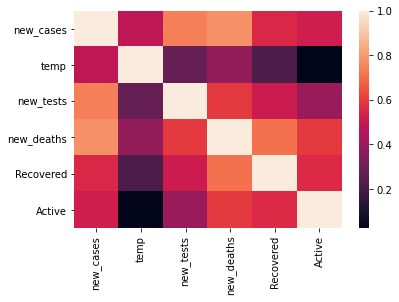

In [ ]:

sns.heatmap(correlations)
plt.show()

In [ ]:
# print(1/0)

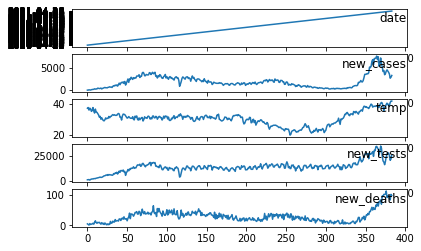

In [ ]:

values = dataset_new.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
plt.figure()
for group in groups:
  plt.subplot(len(groups),1,i)
  plt.plot(values[:, group])
  plt.title(dataset_new.columns[group], y=0.5, loc='right')
  i += 1
plt.show()

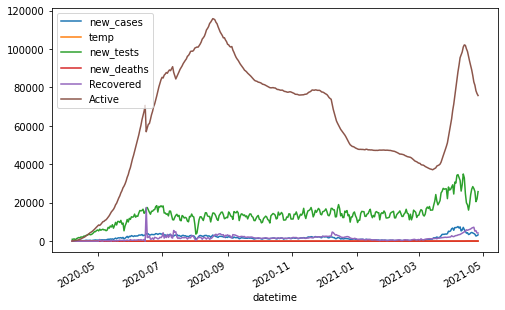

In [ ]:
DF = dataset_new
DF['datetime'] = pd.to_datetime(DF['date'])
DF = DF.set_index('datetime')
DF = DF.drop(['date'], axis = 1)
dataset_new = dataset_new.drop(['datetime'], axis = 1)
DF.plot(figsize=(8,5))
# DF.plot(style=['+-','o-','.--','s:', '.-', '+-'])
plt.show()

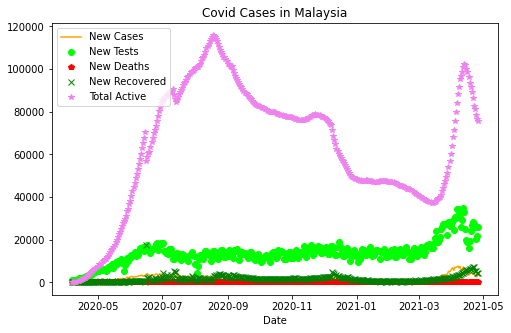

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(DF['new_cases'], color = 'orange', label = 'New Cases')
# plt.plot(DF['temp'], color = 'yellow', label = 'Temperaure')
plt.plot(DF['new_tests'], 'o' , color = 'lime', label = 'New Tests')
plt.plot(DF['new_deaths'], 'p', color = 'red', label = 'New Deaths')
plt.plot(DF['Recovered'], 'x' ,color = 'green', label = 'New Recovered')
plt.plot(DF['Active'], '*', color = 'violet', label = 'Total Active')
plt.title('Covid Cases in Malaysia')
plt.legend()
plt.xlabel('Date')
# plt.ylabel('New Cases')
# plt.savefig('datasets_saudi_arabia.png')
plt.show()

In [ ]:
DF

,new_cases,temp,new_tests,new_deaths,Recovered,Active
datetime,,,,,,
2020-04-07,41.0,37.18,981.0,5.0,0.0,114.0
2020-04-08,54.0,37.64,1097.0,3.0,0.0,165.0
2020-04-09,112.0,35.99,1184.0,1.0,0.0,276.0
2020-04-10,94.0,37.25,649.0,6.0,0.0,364.0
2020-04-11,58.0,36.79,1340.0,3.0,3.0,416.0
...,...,...,...,...,...,...
2021-04-22,4014.0,39.68,27429.0,98.0,7266.0,82844.0
2021-04-23,3629.0,38.75,25896.0,88.0,5225.0,81160.0
2021-04-24,2697.0,40.80,20571.0,83.0,5477.0,78297.0


In [ ]:
# print(1/0)

In [ ]:
dataset_new 

,date,new_cases,temp,new_tests,new_deaths,Recovered,Active
0,2020-04-07,41.0,37.18,981.0,5.0,0.0,114.0
1,2020-04-08,54.0,37.64,1097.0,3.0,0.0,165.0
2,2020-04-09,112.0,35.99,1184.0,1.0,0.0,276.0
3,2020-04-10,94.0,37.25,649.0,6.0,0.0,364.0
4,2020-04-11,58.0,36.79,1340.0,3.0,3.0,416.0
...,...,...,...,...,...,...,...
380,2021-04-22,4014.0,39.68,27429.0,98.0,7266.0,82844.0
381,2021-04-23,3629.0,38.75,25896.0,88.0,5225.0,81160.0
382,2021-04-24,2697.0,40.80,20571.0,83.0,5477.0,78297.0
383,2021-04-25,2922.0,41.76,21922.0,101.0,4301.0,76817.0


In [ ]:
data = dataset_new
# data = data.reset_index(inplace=True)
#  bd data predicted 2 months <2020-09-20 
data_training_df = data[data['date']<'2021-04-17'].copy() 
data_test_df = data[data['date']>='2021-04-17'].copy()
saved_test_data = data_test_df
# data_test_df = data_test_df[data_test_df['date']<='2020-06-15']
print(data_training_df.shape, data_test_df.shape)
data_training_df

(374, 7) (10, 7)


,date,new_cases,temp,new_tests,new_deaths,Recovered,Active
0,2020-04-07,41.0,37.18,981.0,5.0,0.0,114.0
1,2020-04-08,54.0,37.64,1097.0,3.0,0.0,165.0
2,2020-04-09,112.0,35.99,1184.0,1.0,0.0,276.0
3,2020-04-10,94.0,37.25,649.0,6.0,0.0,364.0
4,2020-04-11,58.0,36.79,1340.0,3.0,3.0,416.0
...,...,...,...,...,...,...,...
370,2021-04-12,7201.0,40.29,34968.0,83.0,4523.0,101022.0
371,2021-04-13,6028.0,40.87,32955.0,69.0,4853.0,102128.0
372,2021-04-14,5185.0,40.43,24825.0,96.0,5333.0,101884.0
373,2021-04-15,4192.0,38.38,19959.0,94.0,5915.0,100067.0


In [ ]:
data_test_df

,date,new_cases,temp,new_tests,new_deaths,Recovered,Active
375,2021-04-17,3473.0,37.72,16185.0,101.0,5907.0,96154.0
376,2021-04-18,3698.0,38.09,19404.0,102.0,6121.0,93629.0
377,2021-04-19,4271.0,39.61,24152.0,112.0,6364.0,91424.0
378,2021-04-20,4559.0,40.43,27056.0,91.0,6811.0,89081.0
379,2021-04-21,4280.0,39.37,28408.0,95.0,7072.0,86194.0
380,2021-04-22,4014.0,39.68,27429.0,98.0,7266.0,82844.0
381,2021-04-23,3629.0,38.75,25896.0,88.0,5225.0,81160.0
382,2021-04-24,2697.0,40.80,20571.0,83.0,5477.0,78297.0
383,2021-04-25,2922.0,41.76,21922.0,101.0,4301.0,76817.0
384,2021-04-26,3306.0,41.75,25786.0,97.0,4241.0,75785.0


In [ ]:
data_training_df = data_training_df.drop(['date'], axis = 1)
data_training_df.tail()

,new_cases,temp,new_tests,new_deaths,Recovered,Active
370,7201.0,40.29,34968.0,83.0,4523.0,101022.0
371,6028.0,40.87,32955.0,69.0,4853.0,102128.0
372,5185.0,40.43,24825.0,96.0,5333.0,101884.0
373,4192.0,38.38,19959.0,94.0,5915.0,100067.0
374,4417.0,35.63,18906.0,101.0,5694.0,98689.0


In [ ]:
# inputs = data_training
# data_training['temp'] = data_training['temp']/100
print(data_training_df.shape)
data_training_df.head()

(374, 6)


,new_cases,temp,new_tests,new_deaths,Recovered,Active
0,41.0,37.18,981.0,5.0,0.0,114.0
1,54.0,37.64,1097.0,3.0,0.0,165.0
2,112.0,35.99,1184.0,1.0,0.0,276.0
3,94.0,37.25,649.0,6.0,0.0,364.0
4,58.0,36.79,1340.0,3.0,3.0,416.0


In [ ]:
# cols_to_scale = ['new_cases','new_tests','new_deaths','positive_rate','reproduction_rate']
# cols_to_scale = ['new_cases','new_tests','new_deaths','Recovered', 'Active', 'positive_rate','reproduction_rate']

# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
scaler = MinMaxScaler()
# data_training[cols_to_scale] = scaler.fit_transform(data_training[cols_to_scale])

# data_training.head()   

In [ ]:

data_training = scaler.fit_transform(data_training_df)
print(data_training.shape)
print(type(data_training))
# data_training = np.array(data_training)
data_training

(374, 6)
<class 'numpy.ndarray'>


array([[0.00000000e+00, 8.22425409e-01, 9.67394155e-03, 4.00000000e-02,
        0.00000000e+00, 0.00000000e+00],
       [1.71390903e-03, 8.44562079e-01, 1.30539934e-02, 2.00000000e-02,
        0.00000000e+00, 4.40928544e-04],
       [9.36058009e-03, 7.65158807e-01, 1.55890323e-02, 0.00000000e+00,
        0.00000000e+00, 1.40059655e-03],
       ...,
       [6.78180620e-01, 9.78825794e-01, 7.04449430e-01, 9.50000000e-01,
        3.04169281e-01, 8.79868586e-01],
       [5.47264338e-01, 8.80173244e-01, 5.62662082e-01, 9.30000000e-01,
        3.37363828e-01, 8.64159426e-01],
       [5.76928148e-01, 7.47834456e-01, 5.31979370e-01, 1.00000000e+00,
        3.24759026e-01, 8.52245710e-01]])

In [ ]:
data_training.min(), data_training.max()

(0.0, 1.0)

In [ ]:
X_train = []
y_train = []

for i in range(5, data_training.shape[0]):
    X_train.append(data_training[i-5:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(369, 5, 6) (369,)


In [ ]:


# '''
# -The first layer is the LSTM layer with 60 units.
# -We will be using relu activation function.
# -The rectified linear activation function or ReLU for short is a piecewise linear function 
#   that will output the input directly if it is positive, otherwise,  it will output zero.relu.png
# -return_sequence when set to True returns the full sequence as the output.
# -input_shape is set to (X_train.shape[1],5) which is (60,5)
# -Dropout layer is used to by randomly set the outgoing edges of hidden units to 0 at each update of the training phase.
# -The value passed in dropout specifies the probability at which outputs of the layer are dropped out.
# -The last layer is the Dense layer is the regular deeply connected neural network layer.
# -As we are predicting a single value the units in the last layer is set to 1.'''

# regressor = Sequential()

# regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 120, activation = 'relu'))
# regressor.add(Dropout(0.2))

# regressor.add(Dense(units = 1))
# regressor.summary()

In [ ]:
# '''Here we are compiling the model and fitting it to the training data. 
# We will use 50 epochs to train the model. An epoch is an iteration over the entire data provided. 
# batch_size is the number of samples per gradient update i.e. here the weights will be updates after 32 training examples.
# '''
# # , metrics=['mse', 'mae']
# # regressor.compile(optimizer='adam', loss = 'mean_squared_error')
# tic = time.time()
# # shuffle = false
# # history = regressor.fit(X_train, y_train, epochs=20, batch_size=72, validation_split=0.2)
# tac = time.time()

# print("TIme taken : ", (tac-tic) ,"seconds")

In [ ]:
'''# Visualising the results
accuracy_ = history.history['accuracy']
val_accuracy_ = history.history['val_accuracy']
plt.figure(figsize=(10,5))
plt.plot(accuracy_, color = 'red', label = 'accuracy')
plt.plot(val_accuracy_, color = 'blue', label = 'val accuracy')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

loss_ = history.history['loss']
val_loss_ = history.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(loss_, color = 'red', label = 'loss')
plt.plot(val_loss_, color = 'blue', label = 'val loss')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

mae_ = history.history['mae']
val_mae_ = history.history['val_mae']
plt.figure(figsize=(10,5))
plt.plot(mae_, color = 'red', label = 'mae')
plt.plot(val_mae_, color = 'blue', label = 'val mae')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

mse_ = history.history['mse']
val_mse_ = history.history['val_mse']
plt.figure(figsize=(10,5))
plt.plot(mse_, color = 'red', label = 'mse')
plt.plot(val_mse_, color = 'blue', label = 'val mse')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()
plt.show()'''

"# Visualising the results\naccuracy_ = history.history['accuracy']\nval_accuracy_ = history.history['val_accuracy']\nplt.figure(figsize=(10,5))\nplt.plot(accuracy_, color = 'red', label = 'accuracy')\nplt.plot(val_accuracy_, color = 'blue', label = 'val accuracy')\nplt.title('Covid new Case Prediction')\n# plt.xlabel('Time')\n# plt.ylabel('Google Stock Price')\nplt.legend()\nplt.show()\n\nloss_ = history.history['loss']\nval_loss_ = history.history['val_loss']\nplt.figure(figsize=(10,5))\nplt.plot(loss_, color = 'red', label = 'loss')\nplt.plot(val_loss_, color = 'blue', label = 'val loss')\nplt.title('Covid new Case Prediction')\n# plt.xlabel('Time')\n# plt.ylabel('Google Stock Price')\nplt.legend()\nplt.show()\n\nmae_ = history.history['mae']\nval_mae_ = history.history['val_mae']\nplt.figure(figsize=(10,5))\nplt.plot(mae_, color = 'red', label = 'mae')\nplt.plot(val_mae_, color = 'blue', label = 'val mae')\nplt.title('Covid new Case Prediction')\n# plt.xlabel('Time')\n# plt.ylabel(

In [ ]:
# 60, 60, 80
# 9/9 [==============================] - 2s 239ms/step - loss: 0.0125 - val_loss: 0.0563
'''
past_60_days contains the data of the past 60 days required to predict the opening of the 1st day in the test data set.
'''
print(data_training.shape)
print(type(data_training))

mydata = data[data['date']<'2021-04-17'].copy()
print(mydata.shape)
print(type(mydata))

# past_60_days = mydata[len(mydata)-60:]
past_40_days = mydata.tail(5)
print(past_40_days.shape)
print(type(past_40_days))
# past_60_days

(374, 6)
<class 'numpy.ndarray'>
(374, 7)
<class 'pandas.core.frame.DataFrame'>
(5, 7)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
'''We are going to append data_test to past_60_days and ignore the index of data_test and drop Date and Adj Close.'''

df = past_40_days.append(data_test_df)
df = df.drop(['date'], axis = 1)
print(df.shape)
df

(15, 6)


,new_cases,temp,new_tests,new_deaths,Recovered,Active
370,7201.0,40.29,34968.0,83.0,4523.0,101022.0
371,6028.0,40.87,32955.0,69.0,4853.0,102128.0
372,5185.0,40.43,24825.0,96.0,5333.0,101884.0
373,4192.0,38.38,19959.0,94.0,5915.0,100067.0
374,4417.0,35.63,18906.0,101.0,5694.0,98689.0
375,3473.0,37.72,16185.0,101.0,5907.0,96154.0
376,3698.0,38.09,19404.0,102.0,6121.0,93629.0
377,4271.0,39.61,24152.0,112.0,6364.0,91424.0
378,4559.0,40.43,27056.0,91.0,6811.0,89081.0
379,4280.0,39.37,28408.0,95.0,7072.0,86194.0


In [ ]:
df.isna().sum()

new_cases     0
temp          0
new_tests     0
new_deaths    0
Recovered     0
Active        0
dtype: int64

In [ ]:
inputs = df
# inputs['temp'] = inputs['temp']/100
inputs.tail()

,new_cases,temp,new_tests,new_deaths,Recovered,Active
380,4014.0,39.68,27429.0,98.0,7266.0,82844.0
381,3629.0,38.75,25896.0,88.0,5225.0,81160.0
382,2697.0,40.80,20571.0,83.0,5477.0,78297.0
383,2922.0,41.76,21922.0,101.0,4301.0,76817.0
384,3306.0,41.75,25786.0,97.0,4241.0,75785.0


In [ ]:
# cols_to_scale = ['new_cases','new_tests','new_deaths','positive_rate','reproduction_rate']
# cols_to_scale = ['new_cases','new_tests','new_deaths', 'Recovered', 'Active', 'positive_rate','reproduction_rate']
# inputs[cols_to_scale] = scaler.fit_transform(inputs[cols_to_scale])
# inputs.head()   

In [ ]:
# new = scaler.transform(df)
# new[:3]

In [ ]:
# nparr =  np.array(inputs)
# nparr[:,0]

In [ ]:
inputs = scaler.transform(inputs)
# print(inputs.shape)
# inputs = np.array(inputs)
inputs[:,0]

array([0.94396836, 0.78932103, 0.67818062, 0.54726434, 0.57692815,
       0.45247198, 0.48213579, 0.55767963, 0.59564931, 0.55886618,
       0.52379697, 0.47303889, 0.3501648 , 0.37982861, 0.43045485])

In [ ]:
X_test = []
y_test = []

for i in range(5, inputs.shape[0]):
    X_test.append(inputs[i-5:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((10, 5, 6), (10,))

In [ ]:
X_train.shape, y_train.shape

((369, 5, 6), (369,))

In [ ]:
# adata = data.drop(['date'],axis=1)
# bdata = adata['new_cases']
# cdata = np.array(bdata)
# ddata = cdata.reshape(1,-1)
# ddata = scaler.transform(ddata)

# ddata

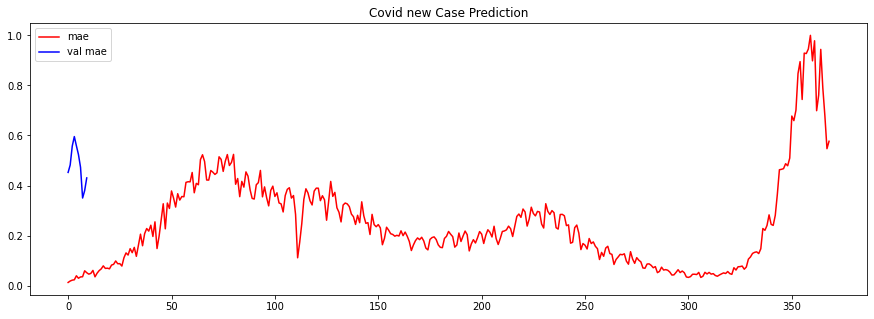

In [ ]:
plt.figure(figsize=(15,5))
# plt.plot(ndata, color='black', label='data')
plt.plot(y_train, color = 'red', label = 'mae')
plt.plot(y_test, color = 'blue', label = 'val mae')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((369, 5, 6), (10, 5, 6), (369,), (10,))

In [ ]:
# print(1/0)

In [ ]:


'''
-The first layer is the LSTM layer with 60 units.
-We will be using relu activation function.
-The rectified linear activation function or ReLU for short is a piecewise linear function 
  that will output the input directly if it is positive, otherwise,  it will output zero.relu.png
-return_sequence when set to True returns the full sequence as the output.
-input_shape is set to (X_train.shape[1],5) which is (60,5)
-Dropout layer is used to by randomly set the outgoing edges of hidden units to 0 at each update of the training phase.
-The value passed in dropout specifies the probability at which outputs of the layer are dropped out.
-The last layer is the Dense layer is the regular deeply connected neural network layer.
-As we are predicting a single value the units in the last layer is set to 1.'''

def create_model():
  regressor = Sequential()  

  regressor.add(LSTM(units = 40, activation = 'relu', return_sequences = True, 
                     input_shape = (X_train.shape[1], 6)))
  # regressor.add(Dropout(0.05))

  # regressor.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
  # regressor.add(Dropout(0.05587))

  # regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
  # regressor.add(Dropout(0.05587))

  regressor.add(LSTM(units = 136, activation = 'relu'))
  # regressor.add(Dropout(0.05))

  regressor.add(Dense(units = 1))
  regressor.summary()
  return regressor
regressor = create_model()
# 40 relu -36 relu- no drop
# Epoch 500/500
# 5/5 [==============================] - 0s 24ms/step - loss: 0.0024 - val_loss: 0.0041
# Epoch 500/500
# 5/5 [==============================] - 0s 22ms/step - loss: 0.0023 - val_loss: 0.0025
# Epoch 100/100
# 5/5 [==============================] - 0s 22ms/step - loss: 0.0023 - val_loss: 0.0020

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 40)             7520      
_________________________________________________________________
lstm_9 (LSTM)                (None, 136)               96288     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# regressor = tf.keras.models.load_model('weights_full_dataset_7_day.h5')

# # Show the model architecture
# regressor.summary()
# regressor.save_weights("model_weights.h5")

In [ ]:
'''Here we are compiling the model and fitting it to the training data. 
We will use 50 epochs to train the model. An epoch is an iteration over the entire data provided. 
batch_size is the number of samples per gradient update i.e. here the weights will be updates after 32 training examples.
'''
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold
    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_loss"]
        if val_acc <= self.threshold:
            self.model.stop_training = True

my_callback = MyThresholdCallback(threshold=0.0012)

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_loss') < 0.0010:
            self.model.stop_training = True

callback = CustomCallback()

# earlystop = EarlyStopping(monitor='val_loss',min_delta=0,patience=2, verbose=1, mode='auto')
# earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=100,  verbose=0, mode='min', restore_best_weights=True)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=500, restore_best_weights=True,  verbose=1, mode='min')
callbacks_list = [earlystop]

optimizer = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-05)
#  metrics=['mse', 'mae']
# regressor = create_model()

regressor.compile(optimizer='adam', loss = 'mean_squared_error')

tic = time.time()
# , shuffle=False
#  validation_data=(X_test, y_test)
'''
history = regressor.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_test, y_test), shuffle=False,
                       callbacks=callbacks_list, 
                        verbose=2
                        )
'''
tac = time.time()

print("TIme taken : ", (tac-tic) ,"seconds")
# name = str(tac-tic)+'.h5'
# regressor.save('saved_model2.h5')


TIme taken :  3.8623809814453125e-05 seconds


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Visualising the results
# accuracy_ = history.history['accuracy']
# val_accuracy_ = history.history['val_accuracy']
# plt.figure(figsize=(10,5))
# plt.plot(accuracy_, color = 'red', label = 'accuracy')
# plt.plot(val_accuracy_, color = 'blue', label = 'val accuracy')
# plt.title('Covid new Case Prediction')
# # plt.xlabel('Time')
# # plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()

# loss_ = history.history['loss']
# val_loss_ = history.history['val_loss']
# plt.figure(figsize=(10,5))
# plt.plot(loss_, color = 'red', label = 'loss')
# plt.plot(val_loss_, color = 'blue', label = 'val loss')
# plt.title('Covid new Case Prediction')
# # plt.xlabel('Time')
# # plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()

# mae_ = history.history['mae']
# val_mae_ = history.history['val_mae']
# plt.figure(figsize=(10,5))
# plt.plot(mae_, color = 'red', label = 'mae')
# plt.plot(val_mae_, color = 'blue', label = 'val mae')
# plt.title('Covid new Case Prediction')
# # plt.xlabel('Time')
# # plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()

# mse_ = history.history['mse']
# val_mse_ = history.history['val_mse']
# plt.figure(figsize=(10,5))
# plt.plot(mse_, color = 'red', label = 'mse')
# plt.plot(val_mse_, color = 'blue', label = 'val mse')
# plt.title('Covid new Case Prediction')
# # plt.xlabel('Time')
# # plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()'''

--------------------------------------------------------------------------------

loop no :  1

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_11 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01859: early stopping


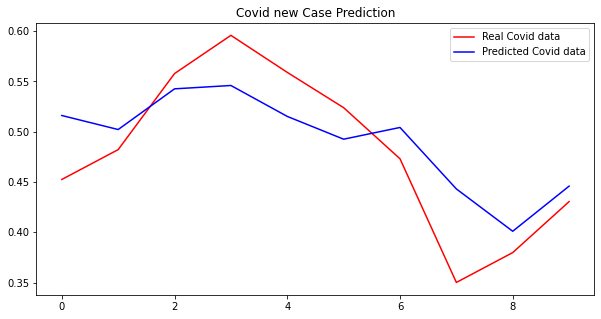

MSE :  116945.72892206322  , rmse :  341.97328685448986  , RMSE :  341.97328685448986
mape :  8.428400177433131

--------------------------------------------------------------------------------

loop no :  2

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_13 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00503: early stopping


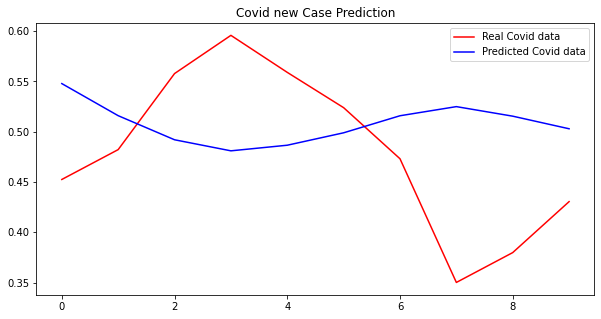

MSE :  514930.39988582756  , rmse :  717.5865103845164  , RMSE :  717.5865103845164
mape :  18.587205442305063

--------------------------------------------------------------------------------

loop no :  3

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_15 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01403: early stopping


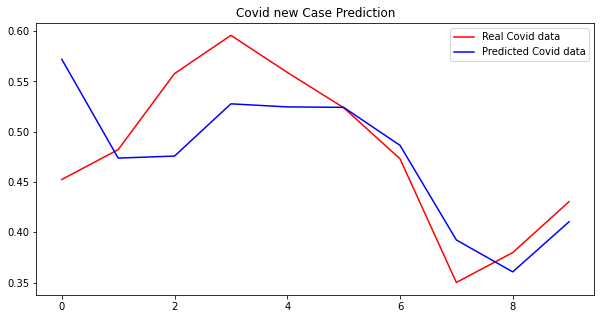

MSE :  170075.77678208947  , rmse :  412.40244516987224  , RMSE :  412.40244516987224
mape :  8.402352860298855

--------------------------------------------------------------------------------

loop no :  4

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_17 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00502: early stopping


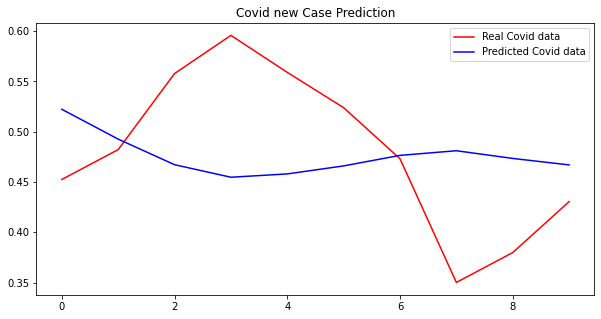

MSE :  424433.3460523489  , rmse :  651.4854918203082  , RMSE :  651.4854918203082
mape :  15.585929856479932

--------------------------------------------------------------------------------

loop no :  5

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_19 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00562: early stopping


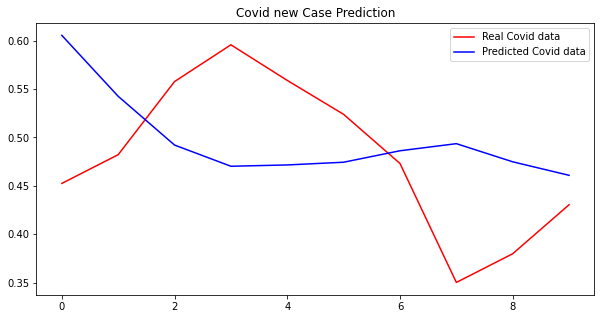

MSE :  505172.49495341803  , rmse :  710.7548768411076  , RMSE :  710.7548768411076
mape :  17.780283343648243

--------------------------------------------------------------------------------

loop no :  6

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_21 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00549: early stopping


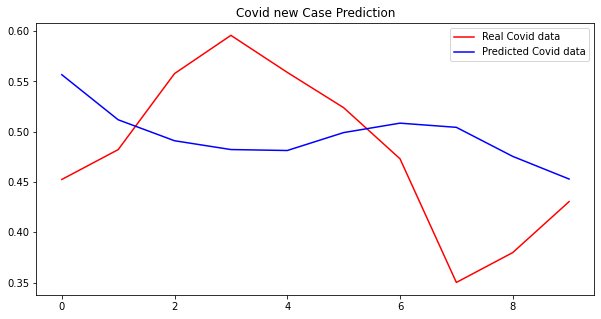

MSE :  404508.27195574064  , rmse :  636.0096476907726  , RMSE :  636.0096476907726
mape :  15.866545298573747

--------------------------------------------------------------------------------

loop no :  7

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_23 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01172: early stopping


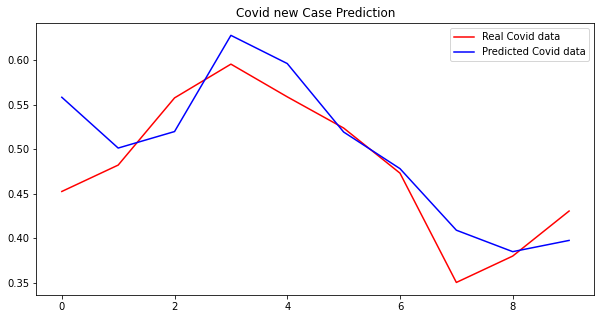

MSE :  115524.20800812833  , rmse :  339.88852291321683  , RMSE :  339.88852291321683
mape :  7.3097836536636

--------------------------------------------------------------------------------

loop no :  8

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_25 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00503: early stopping


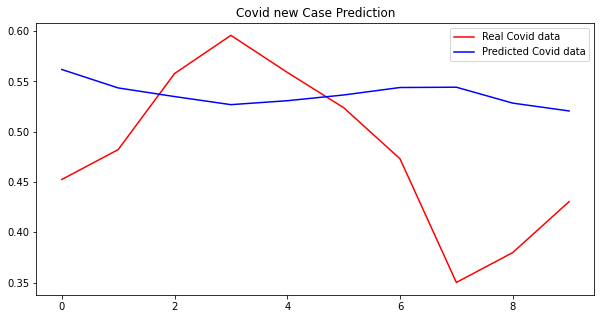

MSE :  544856.0925162557  , rmse :  738.1436801302682  , RMSE :  738.1436801302682
mape :  18.787353999012495

--------------------------------------------------------------------------------

loop no :  9

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_27 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00505: early stopping


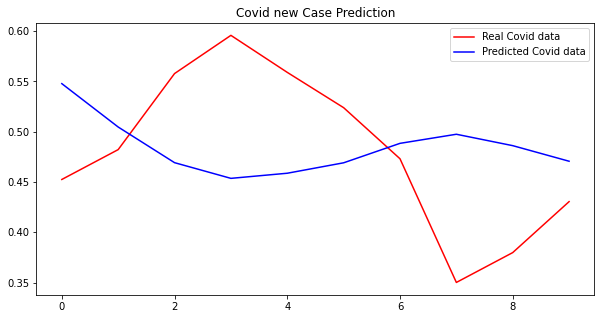

MSE :  491525.0511070254  , rmse :  701.0884759479544  , RMSE :  701.0884759479544
mape :  17.425338077472706

--------------------------------------------------------------------------------

loop no :  10

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_29 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00505: early stopping


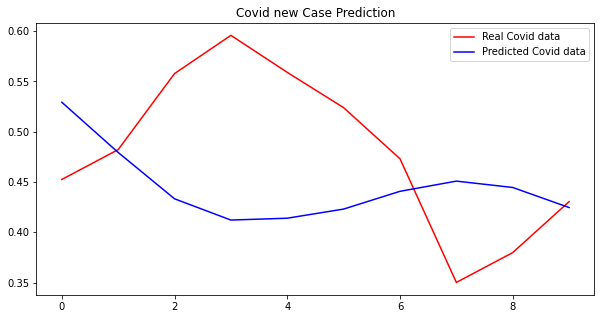

MSE :  584447.3410439136  , rmse :  764.4915572090471  , RMSE :  764.4915572090471
mape :  16.78858366466498

--------------------------------------------------------------------------------

loop no :  11

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_31 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00978: early stopping


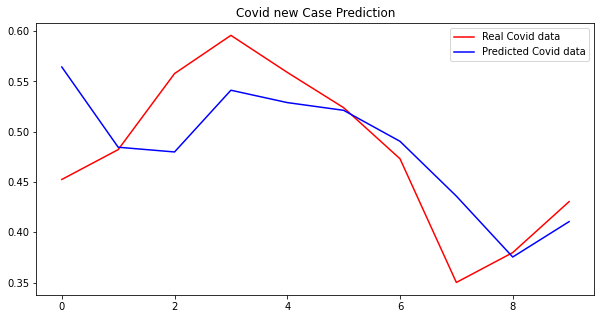

MSE :  175516.5964949787  , rmse :  418.9470091729725  , RMSE :  418.9470091729725
mape :  8.704959875655668

--------------------------------------------------------------------------------

loop no :  12

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_33 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01117: early stopping


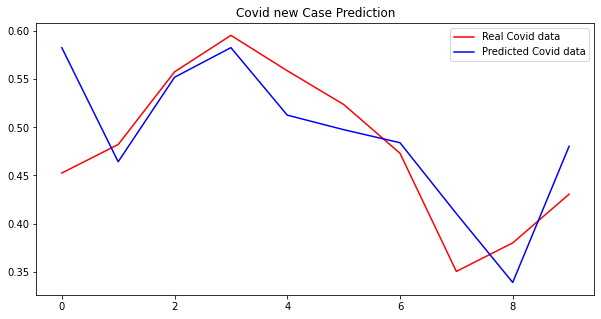

MSE :  162472.34160452493  , rmse :  403.0785799376158  , RMSE :  403.0785799376158
mape :  8.972581904504185

--------------------------------------------------------------------------------

loop no :  13

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_35 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00506: early stopping


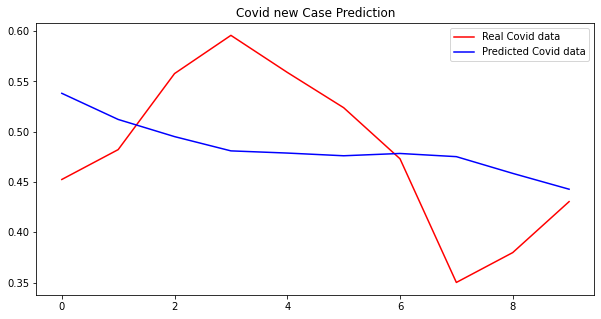

MSE :  322290.63095387246  , rmse :  567.7064654853532  , RMSE :  567.7064654853532
mape :  13.779807916993303

--------------------------------------------------------------------------------

loop no :  14

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_37 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00502: early stopping


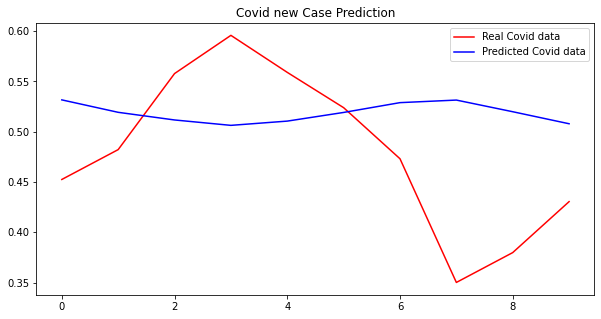

MSE :  469587.93855180766  , rmse :  685.2648674430988  , RMSE :  685.2648674430988
mape :  17.409726532470955

--------------------------------------------------------------------------------

loop no :  15

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_39 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00553: early stopping


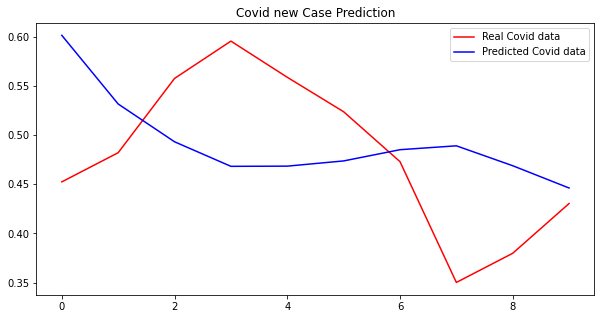

MSE :  479588.0357637885  , rmse :  692.5229496296772  , RMSE :  692.5229496296772
mape :  16.918272903496618

--------------------------------------------------------------------------------

loop no :  16

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_41 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00503: early stopping


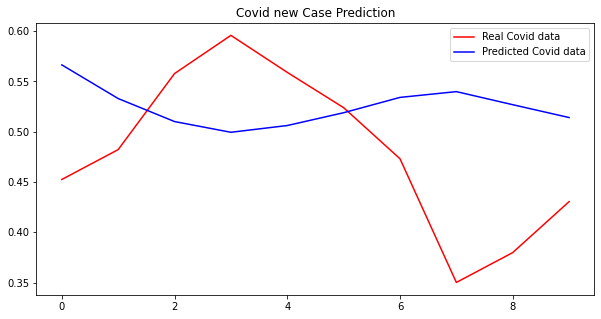

MSE :  564491.1838895503  , rmse :  751.3262832415423  , RMSE :  751.3262832415423
mape :  19.342559208127103

--------------------------------------------------------------------------------

loop no :  17

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_43 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00503: early stopping


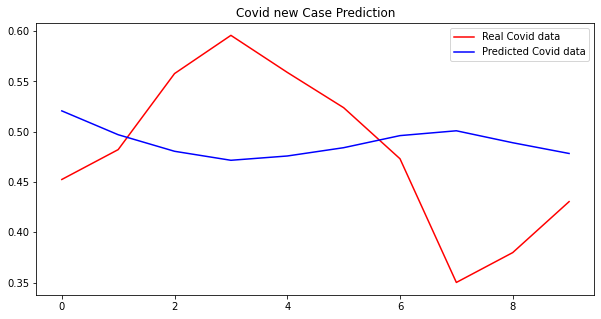

MSE :  415052.7955893936  , rmse :  644.2459123575358  , RMSE :  644.2459123575358
mape :  16.100426504247924

--------------------------------------------------------------------------------

loop no :  18

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_45 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00843: early stopping


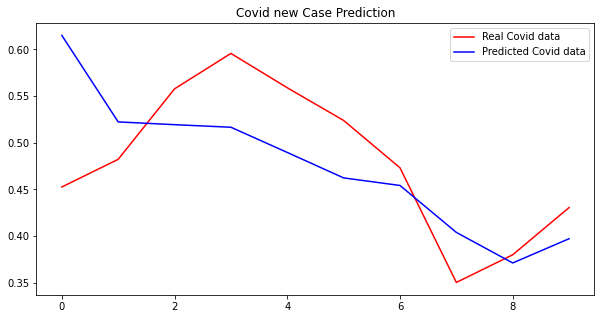

MSE :  280741.1830723466  , rmse :  529.850151526209  , RMSE :  529.850151526209
mape :  11.662365843194237

--------------------------------------------------------------------------------

loop no :  19

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_47 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00900: early stopping


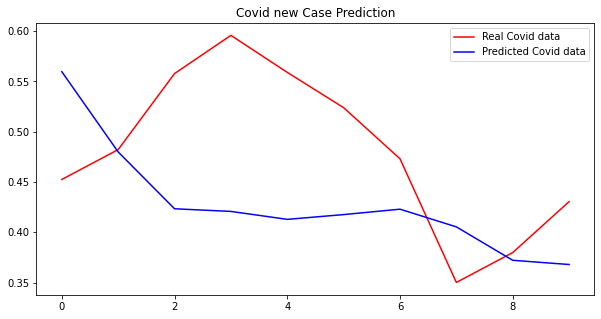

MSE :  588146.4772063914  , rmse :  766.907085119437  , RMSE :  766.907085119437
mape :  16.508053577604915

--------------------------------------------------------------------------------

loop no :  20

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_49 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01435: early stopping


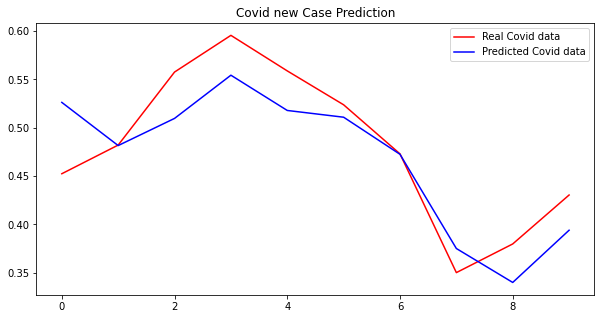

MSE :  85293.2429687083  , rmse :  292.0500692838615  , RMSE :  292.0500692838615
mape :  6.709232868252675

--------------------------------------------------------------------------------

loop no :  21

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_51 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00502: early stopping


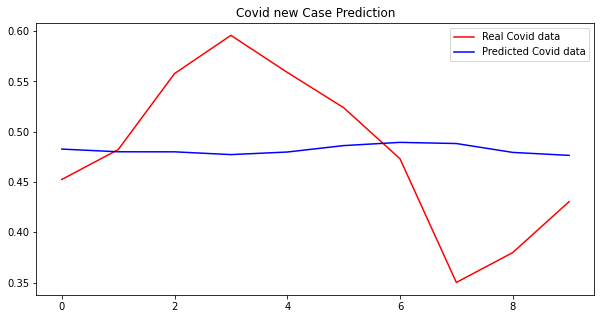

MSE :  345226.57867467427  , rmse :  587.559851142566  , RMSE :  587.559851142566
mape :  14.029141506497359

--------------------------------------------------------------------------------

loop no :  22

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_53 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00831: early stopping


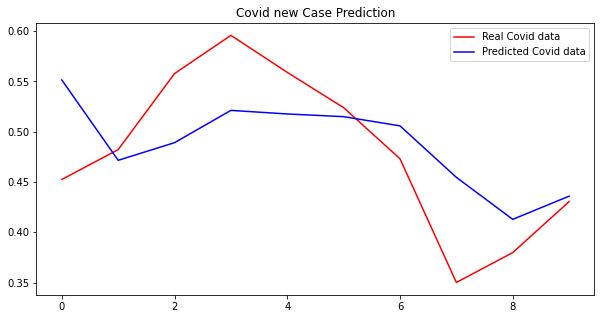

MSE :  201567.27439734942  , rmse :  448.9624420787884  , RMSE :  448.9624420787884
mape :  10.338892299418664

--------------------------------------------------------------------------------

loop no :  23

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_55 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00932: early stopping


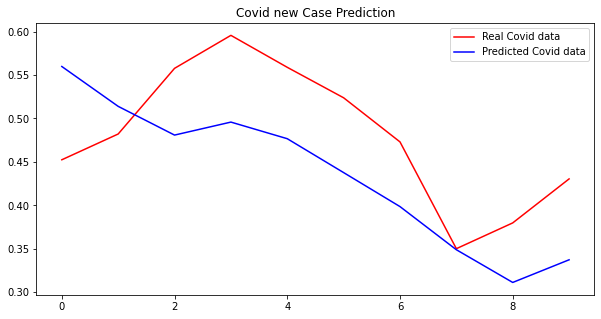

MSE :  353584.38717832573  , rmse :  594.6296218473527  , RMSE :  594.6296218473527
mape :  14.608391119530575

--------------------------------------------------------------------------------

loop no :  24

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_57 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00502: early stopping


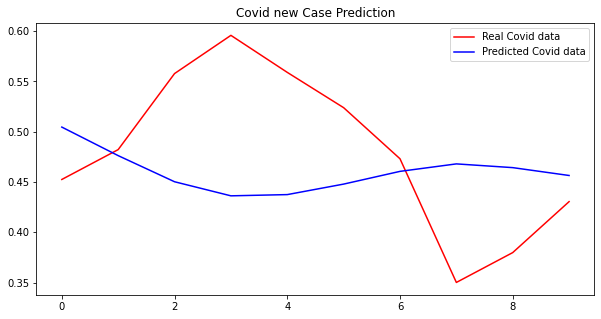

MSE :  472058.0584475043  , rmse :  687.0648138622034  , RMSE :  687.0648138622034
mape :  15.768164340165084

--------------------------------------------------------------------------------

loop no :  25

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_59 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00502: early stopping


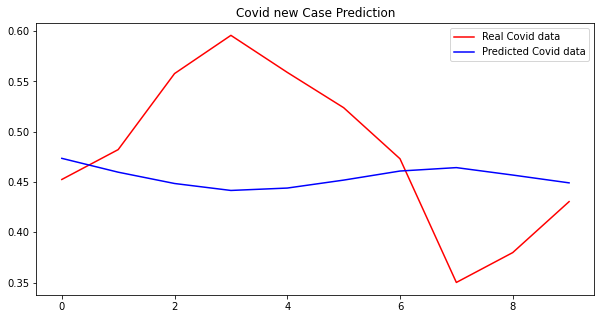

MSE :  428299.8445438567  , rmse :  654.4462121090294  , RMSE :  654.4462121090294
mape :  14.708715663654756

--------------------------------------------------------------------------------

loop no :  26

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_61 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01770: early stopping


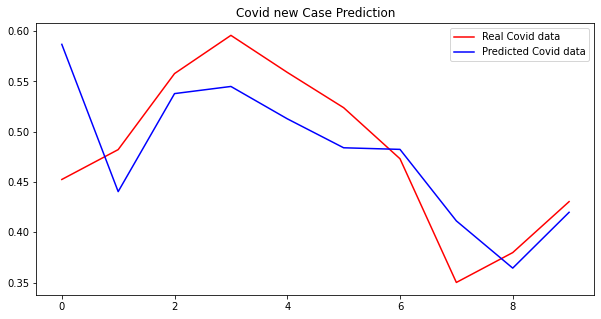

MSE :  176181.28404388434  , rmse :  419.7395431024868  , RMSE :  419.7395431024868
mape :  9.113707292784914

--------------------------------------------------------------------------------

loop no :  27

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_63 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 02249: early stopping


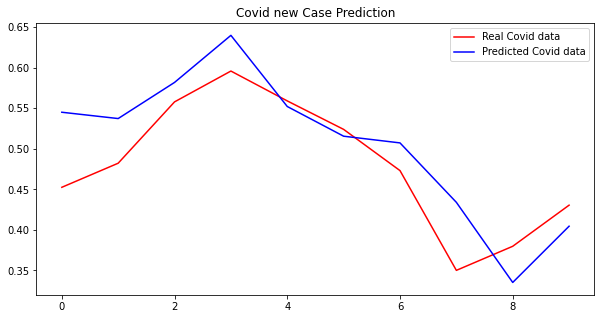

MSE :  144043.12972182632  , rmse :  379.53014336390504  , RMSE :  379.53014336390504
mape :  9.405233904754805

--------------------------------------------------------------------------------

loop no :  28

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_65 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00945: early stopping


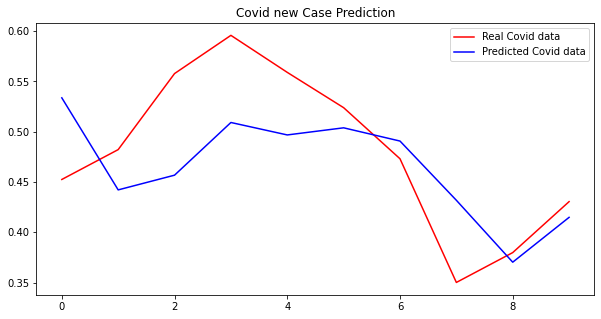

MSE :  215379.2066820086  , rmse :  464.08965371144467  , RMSE :  464.08965371144467
mape :  10.574329000244873

--------------------------------------------------------------------------------

loop no :  29

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_67 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00922: early stopping


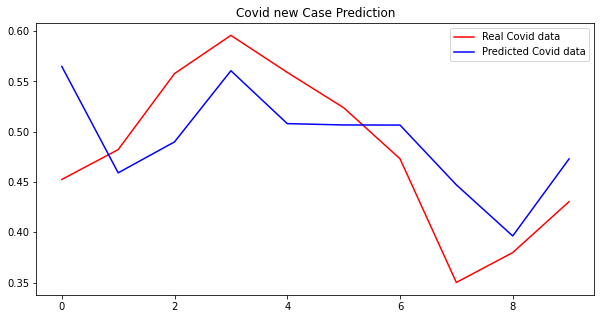

MSE :  198300.3826538564  , rmse :  445.3093112139655  , RMSE :  445.3093112139655
mape :  10.772712867835724

--------------------------------------------------------------------------------

loop no :  30

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_69 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01529: early stopping


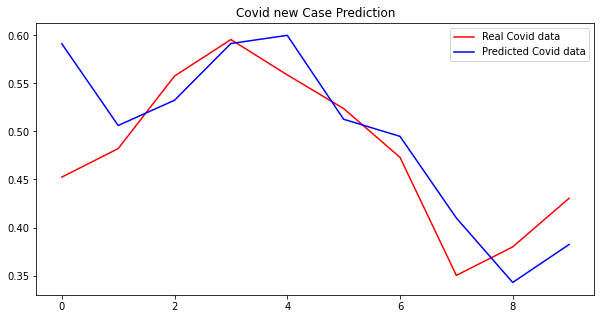

MSE :  172828.16867328278  , rmse :  415.72607408398477  , RMSE :  415.72607408398477
mape :  9.181268335947406

--------------------------------------------------------------------------------

loop no :  31

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_71 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00539: early stopping


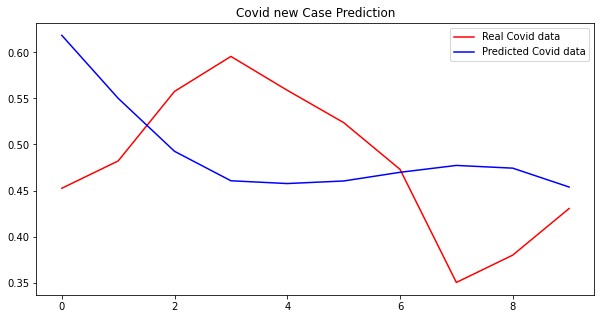

MSE :  544249.9612316313  , rmse :  737.7329877615825  , RMSE :  737.7329877615825
mape :  18.049644015314666

--------------------------------------------------------------------------------

loop no :  32

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_73 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01323: early stopping


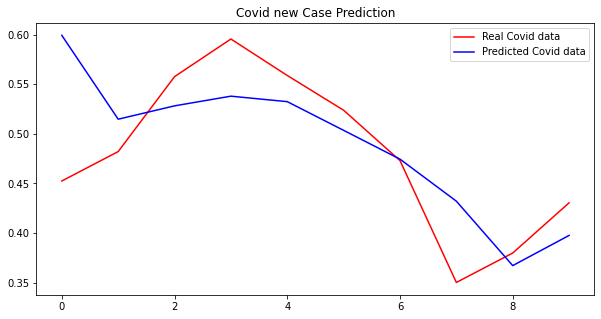

MSE :  206482.39856262808  , rmse :  454.4033434765066  , RMSE :  454.4033434765066
mape :  9.628087760647734

--------------------------------------------------------------------------------

loop no :  33

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_75 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00957: early stopping


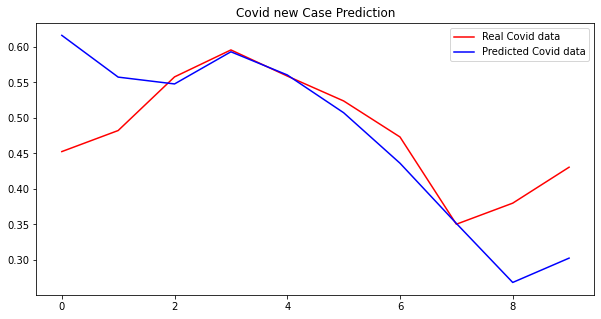

MSE :  362940.296688789  , rmse :  602.4452644753621  , RMSE :  602.4452644753621
mape :  12.32013037583652

--------------------------------------------------------------------------------

loop no :  34

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_77 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 00502: early stopping


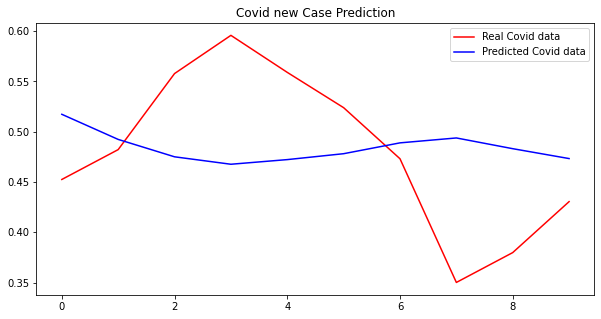

MSE :  405451.4757831397  , rmse :  636.7507171437969  , RMSE :  636.7507171437969
mape :  15.649185913740544

--------------------------------------------------------------------------------

loop no :  35

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_79 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01245: early stopping


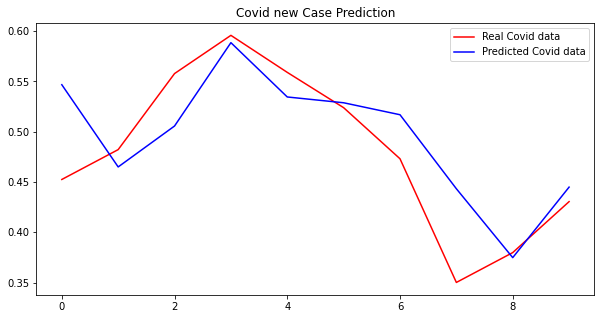

MSE :  134393.32497633103  , rmse :  366.5969516735389  , RMSE :  366.5969516735389
mape :  7.973432264791898

--------------------------------------------------------------------------------

loop no :  36

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_81 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________
Restoring model weights from the end of the best epoch.
Epoch 01054: early stopping


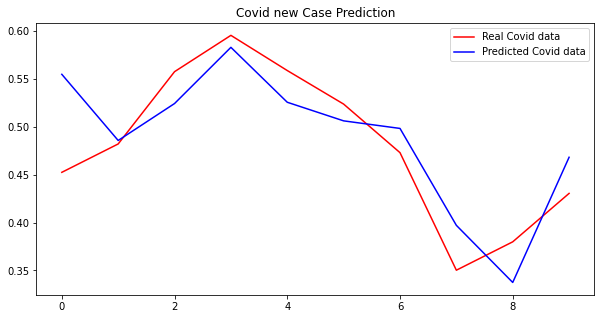

MSE :  110747.76238951091  , rmse :  332.78786394565367  , RMSE :  332.78786394565367
mape :  7.847314526308476

--------------------------------------------------------------------------------

loop no :  37

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_82 (LSTM)               (None, 5, 40)             7520      
_________________________________________________________________
lstm_83 (LSTM)               (None, 136)               96288     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 137       
Total params: 103,945
Trainable params: 103,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# , shuffle=False
#  validation_data=(X_test, y_test)
# '''
from google.colab import files
min_mape =  float('inf')
min_mape_rmse =  float('inf')
min_rmse =  float('inf')
min_rmse_mape =  float('inf')
# start function
def run_many_times():
  # start for loop
  for i in range(100):
    print("--------------------------------------------------------------------------------")
    print()
    print("loop no : ", i+1)
    print()
    global min_mape, min_mape_rmse, min_rmse, min_rmse_mape
    
    # run the model
    regressor = create_model()
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=500, restore_best_weights=True,  verbose=1, mode='min')
    callbacks_list = [earlystop]
    regressor.compile(optimizer='adam', loss = 'mean_squared_error')
    history = regressor.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_test, y_test), shuffle=False,
                        callbacks=callbacks_list, 
                          verbose=0
                          )
    # '''


    ''' evaluate the  model '''
    y_pred = regressor.predict(X_test)
    # y_pred = new_model.predict(X_test)
    # y_pred.shape
    ''' plot the prediction of 10 days '''
    plt.figure(figsize=(10,5))
    plt.plot(y_test, color = 'red', label = 'Real Covid data')
    plt.plot(y_pred, color = 'blue', label = 'Predicted Covid data')
    plt.title('Covid new Case Prediction')
    # plt.xlabel('Time')
    # plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

    ''' calculate rmse // just call the function'''
    inverse_y_test = [rev_min_max_func(x) for x in y_test]
    inverse_y_pred = [rev_min_max_func(x) for x in y_pred]
    # res = np.array(res)
    # print(res.shape)
    # print(res)v
    # inverse_y_test
    inverse_y_pred = np.array(inverse_y_pred)
    inverse_y_test = np.array(inverse_y_test)
    inverse_y_pred = inverse_y_pred.reshape(-1,1)
    inverse_y_test = inverse_y_test.reshape(-1,1)
    # print(inverse_y_pred.shape)
    # print(inverse_y_test.shape)

    MSE = mean_squared_error(inverse_y_test, inverse_y_pred)
    rmse = mean_squared_error(inverse_y_test, inverse_y_pred, squared=False)
    RMSE = math.sqrt(MSE)
    print("MSE : ",MSE," , rmse : ", rmse, " , RMSE : ", RMSE)

    ''' calculate mape '''
    MAPE = mean_absolute_percentage_error(inverse_y_test, inverse_y_pred)
    print("mape : ",MAPE)

    MAPE = round(MAPE,1)
    RMSE = round(RMSE,1)
    
    if(MAPE<min_mape):
      min_mape = MAPE
      min_mape_rmse = RMSE

    if(RMSE<min_rmse):
      min_rmse = RMSE
      min_rmse_mape = MAPE
    # # # name = str(tac-tic)+'.h5'
    regressor.save(f'model_full_10_day_rmse_{RMSE}_mape_{MAPE}_bd.h5')
    regressor.save_weights(f'weights_full_10_day_rmse_{RMSE}_mape_{MAPE}_bd.h5')
    # files.download(f'/content/model_full_10_day_rmse_{RMSE}_mape_{MAPE}_.h5')
    # files.download(f'/content/weights_full_10_day_rmse_{RMSE}_mape_{MAPE}_.h5')

    print()
    # end for loop
# end function


tic = time.time()

run_many_times()

tac = time.time()
print("TIme taken : ", (tac-tic) ,"seconds")
print("min_mape : ",min_mape," min_mape_rmse", min_mape_rmse)
print("min_rmse : ",min_rmse," min_rmse_mape", min_rmse_mape)

In [ ]:
print("min_mape : ",min_mape," min_mape_rmse", min_mape_rmse)
print("min_rmse : ",min_rmse," min_rmse_mape", min_rmse_mape)

In [ ]:

# regressor = create_model()
# regressor = tf.keras.models.load_model('model_full_30_day_rmse_276.4_mape_14.5_mal.h5')

# regressor.load_weights('weights_full_30_day_rmse_276.4_mape_14.5_mal.h5')
# regressor.summary()
# earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=200, restore_best_weights=True,  verbose=1, mode='min')
# callbacks_list = [earlystop]
# regressor.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_test, y_test), shuffle=False,
#                        callbacks=callbacks_list, verbose=2
#                         )

In [ ]:
 # 8.6 369 bd temparature with
# 6.9 355
regressor.evaluate(X_test)

In [ ]:
y_pred = regressor.predict(X_test)
# y_pred = new_model.predict(X_test)
y_pred.shape

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(y_test, color = 'red', label = 'Real Covid Cases')
plt.plot(y_pred, color = 'blue', label = 'Predicted Covid Cases')
plt.title('Covid-19 new Case Prediction of Bangladesh')
plt.xlabel('Date')
plt.ylabel('Covid Cases')
plt.legend()
plt.show()

In [ ]:
# print(max(data_training_df['new_cases']))
# print(min(data_training_df['new_cases']))
# print(max(data_test_df['new_cases']))
# print(min(data_test_df['new_cases']))
# print(max(df['new_cases']))
# print(min(df['new_cases']))

In [ ]:
# max = __builtins__.max

In [ ]:
# takes input scaled values and returns inverse_transfrom
from sklearn.metrics import mean_squared_error
def rev_min_max_func(scaled_val):
  #  give min and max of the dataframe on which minmaxScaler was performed
  # minmaxscaker was performed based on data_training_df so here alsu we use that
    max_val = max(data_training_df['new_cases'])
    min_val = min(data_training_df['new_cases'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
# below two line for scaled datafrane, does the work of inverse_transfrom
# df['pred_target'] = check_scale['a'].apply(lambda x: rev_min_max_func(x))
# print(df)
# below lines for sclaed array, does the work of inverse_transfrom
inverse_y_test = [rev_min_max_func(x) for x in y_test]
inverse_y_pred = [rev_min_max_func(x) for x in y_pred]
# res = np.array(res)
# print(res.shape)
# print(res)v
# inverse_y_test
inverse_y_pred = np.array(inverse_y_pred)
inverse_y_test = np.array(inverse_y_test)
inverse_y_pred = inverse_y_pred.reshape(-1,1)
inverse_y_test = inverse_y_test.reshape(-1,1)
print(inverse_y_pred.shape)
print(inverse_y_test.shape)

MSE = mean_squared_error(inverse_y_test, inverse_y_pred)
rmse = mean_squared_error(inverse_y_test, inverse_y_pred, squared=False)
RMSE = math.sqrt(MSE)
print(MSE," ", RMSE, " ", rmse)
# for 6 featur temp
# 31925.2290128383   178.67632471270025   178.67632471270025 (saved_model2.h5) model_weights.h5 100 epoch 0.20 val loss
# for 5 feature without temp
# 129628.84194310625   360.04005602586255   360.04005602586255 64 - 64
# 61019.57367478527   247.0214032726421   247.0214032726421 36 28
# 32637019.934403233   5712.881928974485   5712.881928974485 36 28 for india

# 42766.66572731733   206.8010293188052   206.8010293188052 40 36 bd 5 feature mape 12 5 day prediction
# 42430.302955158004   205.98617175713034   205.98617175713034 mape 11.04
# 40970.26900710657   202.41113854505778   202.41113854505778 mape 11.24
# 21150.26909738531   145.43132089541547   145.43132089541547 mape 8.26 500 epochs 0.0013
# 20366.998825849587   142.71299459351832   142.71299459351832  mape 8.06 10 day prediction
# 13801.354319061336   117.47916546801538   117.47916546801538 mape 6.5
# 9750251.140343819   3122.539213579842   3122.539213579842 mape 6.01, error 0.0010 7 day, 5 feature predict india.. (1)
# 1.4758453368963842   1.214843749992724   1.214843749992724 mape 0.0027 prev 5day, predict 1 day india (1)
# 1331.2930060376668   36.48688813858571   36.48688813858571 mape 1.75, 3 day predict, 5 feature BD (1)
# 93.009919300671   9.644165039062273   9.644165039062273 mape 0.56, 1 day predict, 5 feature BD (1)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mean_absolute_percentage_error(inverse_y_test, inverse_y_pred))

In [ ]:
actual_val = []
predicted_val = []
for pred, actual in zip(inverse_y_pred,inverse_y_test):
  actual_val.append(int(actual))
  predicted_val.append(int(pred))
  print(pred, actual)

In [ ]:

# print(type([actual]))
# print(type(predicted))
# actual = [actual]
# # print(actual.shape)
# # print(predicted.shape)
# print(len(actual))
# print(len(predicted))

df = pd.DataFrame({'Actual Cases':actual_val, 'Predicted Cases':predicted_val})
df['date'] = pd.date_range(start='3/28/2021', periods=len(df), freq='D')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# df = df.drop(['date'], axis = 1)
df
# saved_test_data

In [ ]:
# plt.figure(figsize=(10,5))
# plt.plot(df['Actual'], color = 'red', label = 'Real Covid Cases')
# plt.plot(df['Predicted'], color = 'blue', label = 'Predicted Covid Cases')
df.plot(figsize=(10,5))
plt.title('Covid-19 new Case Prediction of Malaysia without Temperature')
plt.xlabel('Dates')
plt.ylabel('Covid Cases')
plt.legend()
plt.savefig("Malaysia_30_days_without_temp.png")
plt.show()

In [ ]:
print(1/0)

In [ ]:
# from sklearn.metrics import mean_squared_error  
# import math 
# MSE = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# RMSE = math.sqrt(MSE)
# print(MSE," ", RMSE, " ", rmse)
# 0.004140045778438729   0.06434318750605016   0.06434318750605016
# 0.0024767662298275507   0.04976711996717864   0.04976711996717864 saved_weights saved_model2
# 0.002017457918933688   0.044916120924827066   0.044916120924827066

# 0.008191663076054439   0.09050780671331307   0.09050780671331307 64 64
# 0.007480317659804833   0.0864888296822476   0.0864888296822476 32 32
# 0.003856022984639972   0.0620968838561161   0.0620968838561161 36 28
# 0.0034430270799979267   0.05867731316273715   0.05867731316273715 36 28 for india

# 0.0027025630547631314   0.05198618138277836   0.05198618138277836 bd 5 feature

# 0.0008234486130405307   0.028695794344128736   0.028695794344128736 40 36 india, 3 day predict (1)

In [ ]:
train_pred = regressor.predict(X_train)
# y_pred = y_pred * scale
# y_train = y_train * scale

In [ ]:
# Visualising the results
plt.figure(figsize=(10,5))
plt.plot(y_train, color = 'red', label = 'Real Covid data')
plt.plot(train_pred, color = 'blue', label = 'Predicted Covid data')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

In [ ]:
print(1/0)

In [ ]:
# # # # # MAPE = mean_absolute_percentage_error(inverse_y_test, inverse_y_pred)
regressor.save(f'model_full_10_day_rmse_579_italy.h5')
regressor.save_weights(f'weights_full_10_day_rmse_579_italy.h5')
from google.colab import files
files.download(f'/content/model_full_10_day_rmse_579_italy.h5')
files.download(f'/content/weights_full_10_day_rmse_579_italy.h5')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(inverse_y_test, color = 'red', label = 'Real Covid data')
plt.plot(inverse_y_pred, color = 'blue', label = 'Predicted Covid data')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
inputs[:,0]

In [ ]:
i = [i for i in range(len(y_pred))]
for pred,real, i in zip(y_pred,y_test, i):
  print(pred,real, i)

In [ ]:
scaler.scale_

In [ ]:
scaler.scale_[0]

In [ ]:
scale = 1/scaler.scale_[0]
scale

In [ ]:
yy_pred = y_pred*scale
yy_test = y_test*scale
yy_test.shape, yy_pred.shape

In [ ]:
iinputs = inputs*scale


In [ ]:
iinputs[:,0]

In [ ]:
i = [i for i in range(len(yy_pred))]
for pred,real, i in zip(yy_pred,yy_test, i):
  print(pred,real, i)

In [ ]:
# Visualising the results
plt.figure(figsize=(10,5))
plt.plot(yy_test, color = 'red', label = 'Real Covid data')
plt.plot(yy_pred, color = 'blue', label = 'Predicted Covid data')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

In [ ]:
print(1/0)

In [ ]:
from hyperopt import hp
hp

In [ ]:
def generate_model(dropout, neuronPct, neuronShrink):
  try:
    # We start with some percent of 5000 starting neurons on 
    # the first hidden layer.
    neuronCount = int(neuronPct * 500)
    if neuronCount <= 5:
      raise Exception("Sorry, no numbers below 5")
    # print(neuronCount)
    # Construct neural network
    model = Sequential()

    # So long as there would have been at least 25 neurons and 
    # fewer than 10
    # layers, create a new layer.
    layer = 0
    while neuronCount>=5 and layer<=10:
      if neuronCount < 1:
        raise Exception("Sorry, no numbers below 1")
        # The first (0th) layer needs an input input_dim(neuronCount)
      if layer==0:
        model.add(LSTM(units = neuronCount, 
                       input_shape=(X_train.shape[1], 6), 
                       activation='relu',
                       return_sequences= True))
      else:
        model.add(LSTM(units = neuronCount, activation='relu', return_sequences= True)) 
      layer += 1

        # Add dropout after each hidden layer
      model.add(Dropout(dropout))
        
        # Shrink neuron count for each layer
      neuronCount = int(neuronCount * neuronShrink)
        # print(neuronCount)

    # model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.add(LSTM(units = 7, activation = 'relu'))
    model.add(Dropout(dropout))
    # layer+=1
    model.add(Dense(units = 1))
    return model
  except:
    regressor = Sequential()  

    regressor.add(LSTM(units = 200, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 6)))
    # regressor.add(Dropout(0.05))

    # regressor.add(LSTM(units = 10, activation = 'relu', return_sequences = True))
    # regressor.add(Dropout(0.05587))

    # regressor.add(LSTM(units = 10, activation = 'relu', return_sequences = True))
    # regressor.add(Dropout(0.05587))

    regressor.add(LSTM(units = 10, activation = 'tanh'))
    # regressor.add(Dropout(0.05))

    regressor.add(Dense(units = 1))
    # regressor.summary()#
    return regressor


In [ ]:
model = generate_model(dropout=0.05, neuronPct=0.001, neuronShrink=0.025)
model.summary()

In [ ]:
'''from sklearn.metrics import mean_squared_error
import math
def evaluate_network(dropout,lr,neuronPct,neuronShrink):
    # SPLITS = 2

    # Bootstrap
    # boot = StratifiedShuffleSplit(n_splits=SPLITS, test_size=0.1)

    # # Track progress
    mean_benchmark = []
    epochs_needed = []
    num = 0

    # Loop through samples
    # for train, test in boot.split(x,df['product']):
    start_time = time.time()
    num+=1

    # Split train and test
    x_train = X_train
    # y_train = y_train
    x_test = X_test
    # y_test = y_test

    model = generate_model(dropout, neuronPct, neuronShrink)
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=lr))
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=100, verbose=0, mode='auto', restore_best_weights=True)

    # Train on the bootstrap sample
    model.fit(X_train,y_train,validation_data=(x_test,y_test),
              callbacks=[monitor],verbose=0,epochs=1000)
    epochs = monitor.stopped_epoch
    epochs_needed.append(epochs)
    # print(epochs, " runned")

    # Predict on the out of boot (validation)
    pred = model.predict(x_test)

    # Measure this bootstrap's log loss
    # y_compare = np.argmax(y_test,axis=1) # For log loss calculation
    # score = metrics.log_loss(y_compare, pred)
    # mean_benchmark.append(score)
    # m1 = statistics.mean(mean_benchmark)
    # m2 = statistics.mean(epochs_needed)
    # mdev = statistics.pstdev(mean_benchmark)
    # MSE = mean_squared_error(y_test, pred)
 
    # RMSE = math.sqrt(MSE)
    rmse = mean_squared_error(y_test, pred, squared=False)

    # Record this iteration
    time_took = time.time() - start_time
        
    tensorflow.keras.backend.clear_session()
    return (rmse)'''

In [ ]:
!pip install bayesian-optimization
!pip install keras-tuner

In [ ]:
from sklearn.metrics import mean_squared_error
def evaluate_network(dropout,lr,neuronPct,neuronShrink):
  try:
    SPLITS = 2

    # Bootstrap
    # boot = StratifiedShuffleSplit(n_splits=SPLITS, test_size=0.1)

      # Track progress
    mean_benchmark = []
    epochs_needed = []
    num = 0
      

      # Loop through samples
    # for train, test in boot.split(x,df['product']):
    start_time = time.time()
    num+=1

        # Split train and test
    # x_train = X_train
    # y_train = y_train
    # x_test = X_test
    # y_test = y_test

    model = generate_model(dropout, neuronPct, neuronShrink)
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=lr))
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=100, verbose=0, mode='min', restore_best_weights=True)

        # Train on the bootstrap sample
    model.fit(X_train,y_train,validation_data=(X_test,y_test),
                    callbacks=[monitor],verbose=0,epochs=1000)
    epochs = monitor.stopped_epoch
    epochs_needed.append(epochs)

        # Predict on the out of boot (validation)
    pred = model.predict(X_test)

        # Measure this bootstrap's log loss
    # y_compare = np.argmax(y_test,axis=1) # For log loss calculation
    # score = metrics.log_loss(y_compare, pred)
    # mean_benchmark.append(score)
    # m1 = statistics.mean(mean_benchmark)
    # m2 = statistics.mean(epochs_needed)
    # mdev = statistics.pstdev(mean_benchmark)

          # Record this iteration
    rmse = mean_squared_error(y_test, pred, squared=False)
    time_took = time.time() - start_time
          
    tensorflow.keras.backend.clear_session()
    return (rmse)
  except:
    retrun -100


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from bayes_opt import BayesianOptimization
import time

# Supress NaN warnings
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)

# Bounded region of parameter space
pbounds = {'dropout': (0.0, 0.2),
          'lr': (0.0, 0.1),
          'neuronPct': (0.01, 1),
          'neuronShrink': (0.01, 1)
          }

optimizer = BayesianOptimization(
    f=evaluate_network,
    pbounds=pbounds,
    verbose=2,  # verbose = 1 prints only when a maximum 
    # is observed, verbose = 0 is silent
    random_state=1,
)

start_time = time.time()
try:
  optimizer.maximize(init_points=10, n_iter=10)
except:
  print("an exception occured bro!")
time_took = time.time() - start_time

print(f"Total runtime: {hms_string(time_took)}")
print(optimizer.max)


In [ ]:
print(optimizer.max)

In [ ]:
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization

# n_input = 6
def build_model(hp):
  model = Sequential()
  model.add(LSTM(units=hp.Int('units 0',min_value=5,
                                    max_value=200,
                                    step=5), 
               activation='relu', input_shape = (X_train.shape[1], 6), return_sequences=True))
  
  model.add(LSTM(units=hp.Int('units 1',min_value=10,
                                    max_value=200,
                                    step=10), activation='relu', return_sequences=True))
  
  # model.add(LSTM(units=hp.Int('units',min_value=15,
  #                                   max_value=225,
  #                                   step=15), activation='relu', return_sequences=True))

  model.add(LSTM(units=hp.Int('units 2',min_value=15,
                                    max_value=225,
                                    step=15), activation='relu'))
  model.add(Dense(1))
  
  model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])) )
  return model

bayesian_opt_tuner = BayesianOptimization(
    build_model,
    objective='mse',
    max_trials=10,
    executions_per_trial=3,
    # directory=os.path.normpath('C:/keras_tuning'),
    # directory=path.normpath('/content/'),
    # project_name='kerastuner_bayesian_poc',
    overwrite=True)
n_epochs = 100
# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
#     patience=20, verbose=0, mode='auto', restore_best_weights=True)
bayesian_opt_tuner.search(X_train, y_train,epochs=n_epochs,
     validation_data=(X_test, y_test), verbose=0, shuffle=False)
    #  validation_split=0.2,verbose=1, shuffle=False)


bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
model = bayes_opt_model_best_model[0]
bayesian_opt_tuner.results_summary()

In [ ]:
# best_hp = tuner.get_best_hyperparameters()[0]
hp = bayesian_opt_tuner.get_best_hyperparameters(1)[0]
# ml = tuner_bo.hypermodel.build(hp)
hp.values

In [ ]:
model.summary()

In [ ]:
mse_bo = model.evaluate(X_test, y_test)[1]
mse_bo

In [ ]:
pred_res = model.predict(X_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test, color = 'red', label = 'Real Covid data')
plt.plot(pred_res, color = 'blue', label = 'Predicted Covid data')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

In [ ]:
# https://towardsdatascience.com/hyperparameter-tuning-with-keras-tuner-283474fbfbe
# https://github.com/cedricconol/keras-tuner-demo/blob/master/Hyperparameter%20Tuning%20Demo%20with%20Keras%20Tuner.ipynb

In [ ]:
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
from kerastuner import HyperModel
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(
            LSTM( 
                units=hp.Int('units 0', 8, 512, 4, 
                             default=8
                             ),
                activation=hp.Choice(
                    'dense_activation 0',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'
                    ),
                input_shape=input_shape,
                 return_sequences=True
            )
        )
        
        model.add(
            LSTM(
                units=hp.Int('units 1', 16, 512, 4, 
                             default=16
                             ),
                activation=hp.Choice(
                    'dense_activation 1',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'
                    ),
                    # return_sequences=True
            )
        )
        
        model.add(
            Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(Dense(1))
        
        # model.compile(
        #     optimizer='rmsprop',loss='mse',metrics=['mse']
        # )
        model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
          hp.Choice('learning_rate',
                    values=[1e-2, 1e-3, 1e-4]), hp.Choice('decay',
                    values=[1e-3, 1e-4, 1e-5]) ) )
        
        return model

In [ ]:
input_shape = (X_train.shape[1], 6)
hypermodel = RegressionHyperModel(input_shape)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_loss',
            max_trials=20,
            seed=42,
            executions_per_trial=1,
            overwrite=True,
            directory='BayesianOptimization_dir',
            project_name='BayesianOptimization_proj'
        )
import time
tic = time.time()
tuner_bo.search(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=1, shuffle=False)
print("Time taken ", time.time()-tic)
import pickle
name = "rony_"+str(int(time.time()))
print("name = ",name)
with open(f"tuner_bo_{name}.pkl", "wb") as f:
  pickle.dump(tuner_bo, f)
best_model = tuner_bo.get_best_models(num_models=1)[0]
print(tuner_bo.results_summary())


In [ ]:
# name = "rony_"+str(int(time.time()))
print(name)

In [ ]:

!zip -r /content/BayesianOptimization_dir.zip /content/
from google.colab import files
files.download("/content/BayesianOptimization_dir.zip")

In [ ]:
best_model.summary()

In [ ]:
print(tuner_bo.get_best_hyperparameters()[0].values)

In [ ]:
# takes input scaled values and returns inverse_transfrom
y_pred_res_bo = best_model.predict(X_test)
def rev_min_max_func(scaled_val):
  #  give min and max of the dataframe on which minmaxScaler was performed
  # minmaxscaker was performed based on data_training_df so here alsu we use that
    max_val = max(data_training_df['new_cases'])
    min_val = min(data_training_df['new_cases'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
# below two line for scaled datafrane, does the work of inverse_transfrom
# df['pred_target'] = check_scale['a'].apply(lambda x: rev_min_max_func(x))
# print(df)
# below lines for sclaed array, does the work of inverse_transfrom
inverse_y_test = [rev_min_max_func(x) for x in y_test]
inverse_y_pred_pickle = [rev_min_max_func(x) for x in y_pred_res_bo]
# res = np.array(res)
# print(res.shape)
# print(res)v
# inverse_y_test
inverse_y_pred_pickle = np.array(inverse_y_pred_pickle)
inverse_y_test = np.array(inverse_y_test)
inverse_y_pred_pickle = inverse_y_pred_pickle.reshape(-1,1)
inverse_y_test = inverse_y_test.reshape(-1,1)
print(inverse_y_pred_pickle.shape)
print(inverse_y_test.shape)

MSE = mean_squared_error(inverse_y_test, inverse_y_pred_pickle)
rmse = mean_squared_error(inverse_y_test, inverse_y_pred_pickle, squared=False)
RMSE = math.sqrt(MSE)
print(MSE," ", RMSE, " ", rmse)
# 114534.47211681865   338.42941969754736   338.42941969754736 64 64  

for pred, actual in zip(inverse_y_pred_pickle,inverse_y_test):
  print(pred, actual)

In [ ]:
tuner_bo_pickle = pickle.load(open("tuner_bo_"+name+".pkl", "rb"))
print(tuner_bo_pickle.get_best_hyperparameters()[0].values)
best_model_pickle = tuner_bo_pickle.get_best_models(num_models=1)[0]
best_model_pickle.summary()
best_model_pickle.save(name+"best_model_pickle.h5")
best_model_pickle.save_weights(name+"best_model_pickle_weights.h5")

In [ ]:
# mse_bo_pickle = best_model_pickle.evaluate(X_test, y_test)[1]
# mse_bo_pickle

In [ ]:
# best_model_pickle.load_weights('best_model_pickle_results_weights.h5')

In [ ]:
# y_pred_res_pickle = best_model_pickle.predict(X_test)

In [ ]:
# best_model.summary()

In [ ]:
# # best_hp = tuner.get_best_hyperparameters()[0]
# hp = tuner_bo.get_best_hyperparameters(1)[0]
# # ml = tuner_bo.hypermodel.build(hp)
# hp.values

In [ ]:
# mse_bo = best_model.evaluate(X_test, y_test)[1]
# mse_bo

In [ ]:
y_pred_res = best_model.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(y_test, color = 'red', label = 'Real Covid data')
plt.plot(y_pred_res, color = 'blue', label = 'Predicted Covid data')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

In [ ]:
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
tuner_rs = RandomSearch(
            hypermodel,
            objective='mse',
            seed=42,
            max_trials=50,
            executions_per_trial=2,
            overwrite=True
        )

tuner_rs.search(X_train, y_train, epochs=100, validation_data = (X_test, y_test), verbose=1)
best_model_rs = tuner_rs.get_best_models(num_models=1)[0]
tuner_rs.results_summary()
name = "rony_"+str(int(time.time()))
with open(f"tuner_rs_{name}.pkl", "wb") as f:
  pickle.dump(tuner_rs, f)

In [ ]:
print(name)

In [ ]:
best_model_rs.summary()

In [ ]:
tuner_rs.get_best_hyperparameters(1)[0].values

In [ ]:
y_pred_rs = best_model.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(y_test, color = 'red', label = 'Real Covid data')
plt.plot(y_pred_rs, color = 'blue', label = 'Predicted Covid data')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

In [ ]:

tuner_hb = Hyperband(
            hypermodel,
            max_epochs=50,
            objective='mse',
            seed=42,
            executions_per_trial=3,
            directory='hb'
        )

tuner_hb.search(X_train, y_train, epochs=100, validation_data=(X_test,y_test), verbose=1)

best_model_hb = tuner_hb.get_best_models(num_models=1)[0]
best_model_hb.results_summary()
mse_hb = best_model_hb.evaluate(X_test, y_test)[1]
print('Hyperband MSE: ', mse_hb)
name = "rony_"+str(int(time.time()))
with open(f"tuner_hb_{name}.pkl", "wb") as f:
  pickle.dump(tuner_hb, f)


In [ ]:
print(name)

In [ ]:
tuner_hb.get_best_hyperparameters(1)[0].values

In [ ]:
best_model_hb.summary()

In [ ]:
y_pred_hb = best_model_hb.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(y_test, color = 'red', label = 'Real Covid data')
plt.plot(y_pred_hb, color = 'blue', label = 'Predicted Covid data')
plt.title('Covid new Case Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

In [ ]:
files.download("/content/BayesianOptimization_dir.zip")